Лера:  поддержка стандартов, количество фронтальных камер, порт USB, год релиза, Поддержка быстрой зарядки, сенсор разпознания лица, емкость аккамулятора , сканер отпечатка пальца, берамочный, поддержка беспроводной зарядки, обратная беспородная зарядка, Чехол, сканер LiDAR, Поддержка HDR, Встроенный искусственный интеллект

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../mvideo_features.csv')

In [4]:
# Удаляем дубликаты по всем признакам, кроме product_id, оставляя только одну запись для каждого уникального товара
data = data.drop_duplicates(subset=data.columns.difference(['product_id']), keep='first').reset_index(drop=True)
print(f'Размерность после удаления дубликатов: {data.shape}')

Размерность после удаления дубликатов: (929, 104)


Поддержка стандартов 

In [5]:
df = data[['Поддержка стандартов', 'salePrice']]
print(df['Поддержка стандартов'].isna().sum())
df['Поддержка стандартов'].unique()

2


array(['2G/3G/4G LTE/5G', '2G/3G/4G LTE', '4G LTE', '3G/4G LTE',
       '4G LTE/5G', '3G/4G LTE/5G', nan, '2G/4G LTE/5G'], dtype=object)

In [6]:
import re
df['standarts'] = df['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))

In [7]:
df['standarts']

0      [2G, 3G, 4G, LTE, 5G]
1      [2G, 3G, 4G, LTE, 5G]
2          [2G, 3G, 4G, LTE]
3      [2G, 3G, 4G, LTE, 5G]
4          [2G, 3G, 4G, LTE]
               ...          
924    [2G, 3G, 4G, LTE, 5G]
925    [2G, 3G, 4G, LTE, 5G]
926    [2G, 3G, 4G, LTE, 5G]
927    [2G, 3G, 4G, LTE, 5G]
928    [2G, 3G, 4G, LTE, 5G]
Name: standarts, Length: 929, dtype: object

In [8]:
df['is_5G'] = df['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)

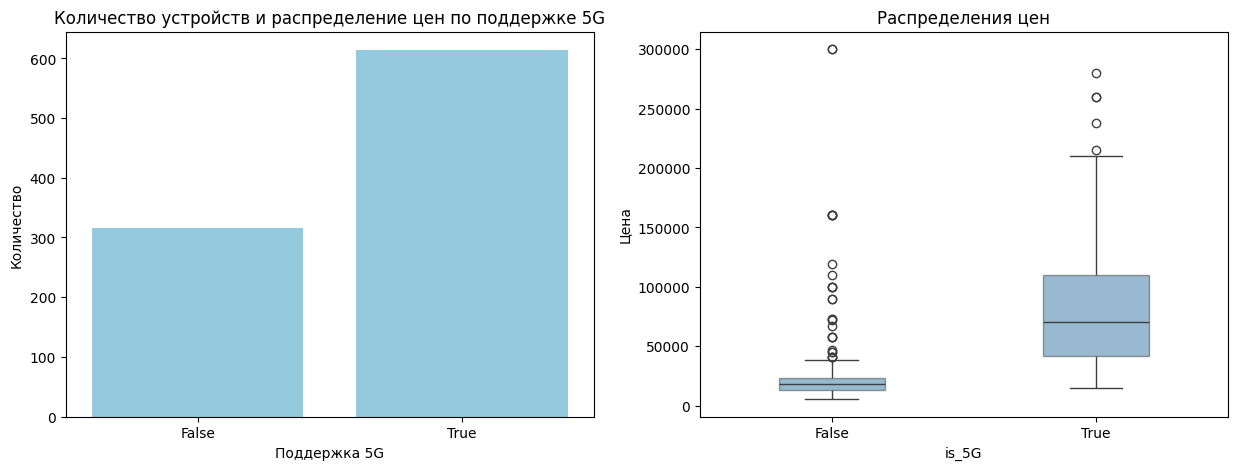

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='is_5G', data=df, ax=ax1, color='skyblue')
ax1.set_xlabel('Поддержка 5G')
ax1.set_ylabel('Количество')
ax1.set_title('Количество устройств и распределение цен по поддержке 5G')

sns.boxplot(x='is_5G', y='salePrice', data=df, ax=ax2, width=0.4, boxprops=dict(alpha=0.5))
ax2.set_ylabel('Цена')
ax2.set_title('Распределения цен')

plt.show()

Количество фронтальных камер

In [10]:
df = data[['Количество фронтальных камер (шт)', 'salePrice']]
print(df['Количество фронтальных камер (шт)'].isna().sum())
df['Количество фронтальных камер (шт)'].unique()

2


array([ 1.,  2., nan,  3.])

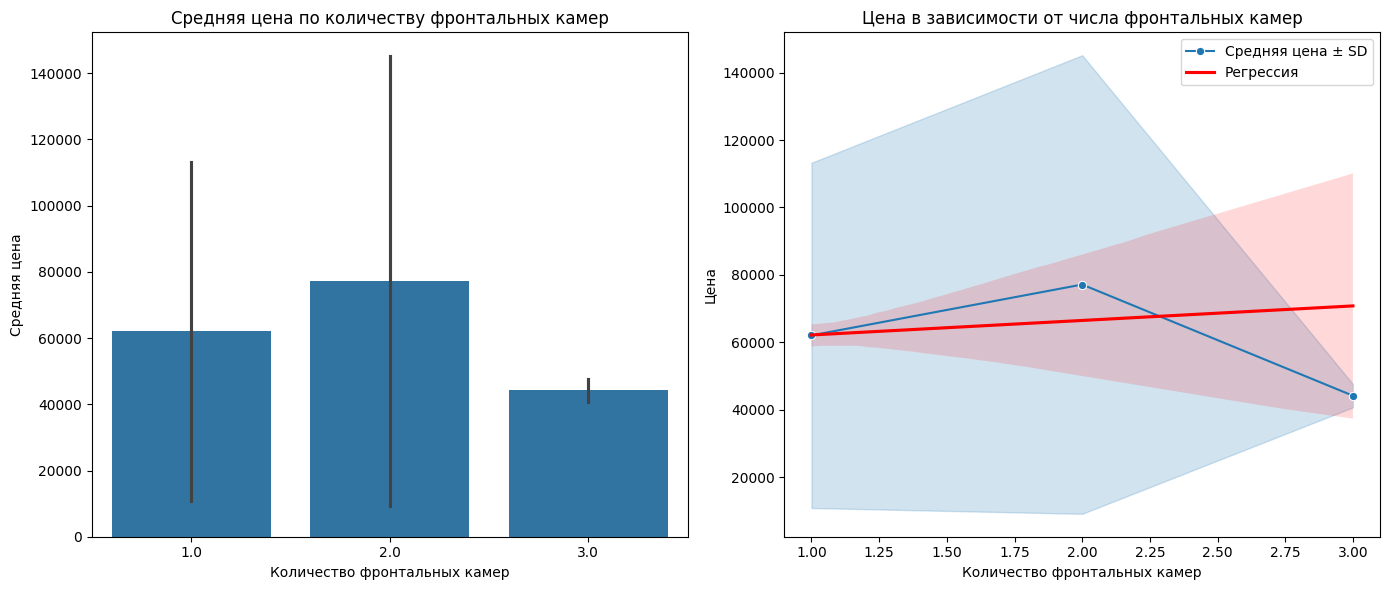

In [11]:
df = data[['Количество фронтальных камер (шт)', 'salePrice']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(
    data=df,
    x='Количество фронтальных камер (шт)',
    y='salePrice',
    ax=axes[0],
    estimator='mean',
    ci='sd'
)
axes[0].set_title('Средняя цена по количеству фронтальных камер')
axes[0].set_ylabel('Средняя цена')
axes[0].set_xlabel('Количество фронтальных камер')

sns.lineplot(
    data=df,
    x='Количество фронтальных камер (шт)',
    y='salePrice',
    ax=axes[1],
    ci='sd',
    marker='o',
    label='Средняя цена ± SD'
)
sns.regplot(
    data=df,
    x='Количество фронтальных камер (шт)',
    y='salePrice',
    ax=axes[1],
    scatter=False,
    color='red',
    label='Регрессия'
)

axes[1].set_title('Цена в зависимости от числа фронтальных камер')
axes[1].set_ylabel('Цена')
axes[1].set_xlabel('Количество фронтальных камер')
axes[1].legend()

plt.tight_layout()
plt.show()


In [12]:
data.brand.unique()

array(['Apple', 'HONOR', 'HUAWEI', 'POCO', 'Samsung', 'Xiaomi', 'realme',
       'Infinix', 'vivo', 'OPPO', 'Tecno', 'Motorola', 'Nubia', 'Redmi',
       'Nothing', 'OnePlus'], dtype=object)

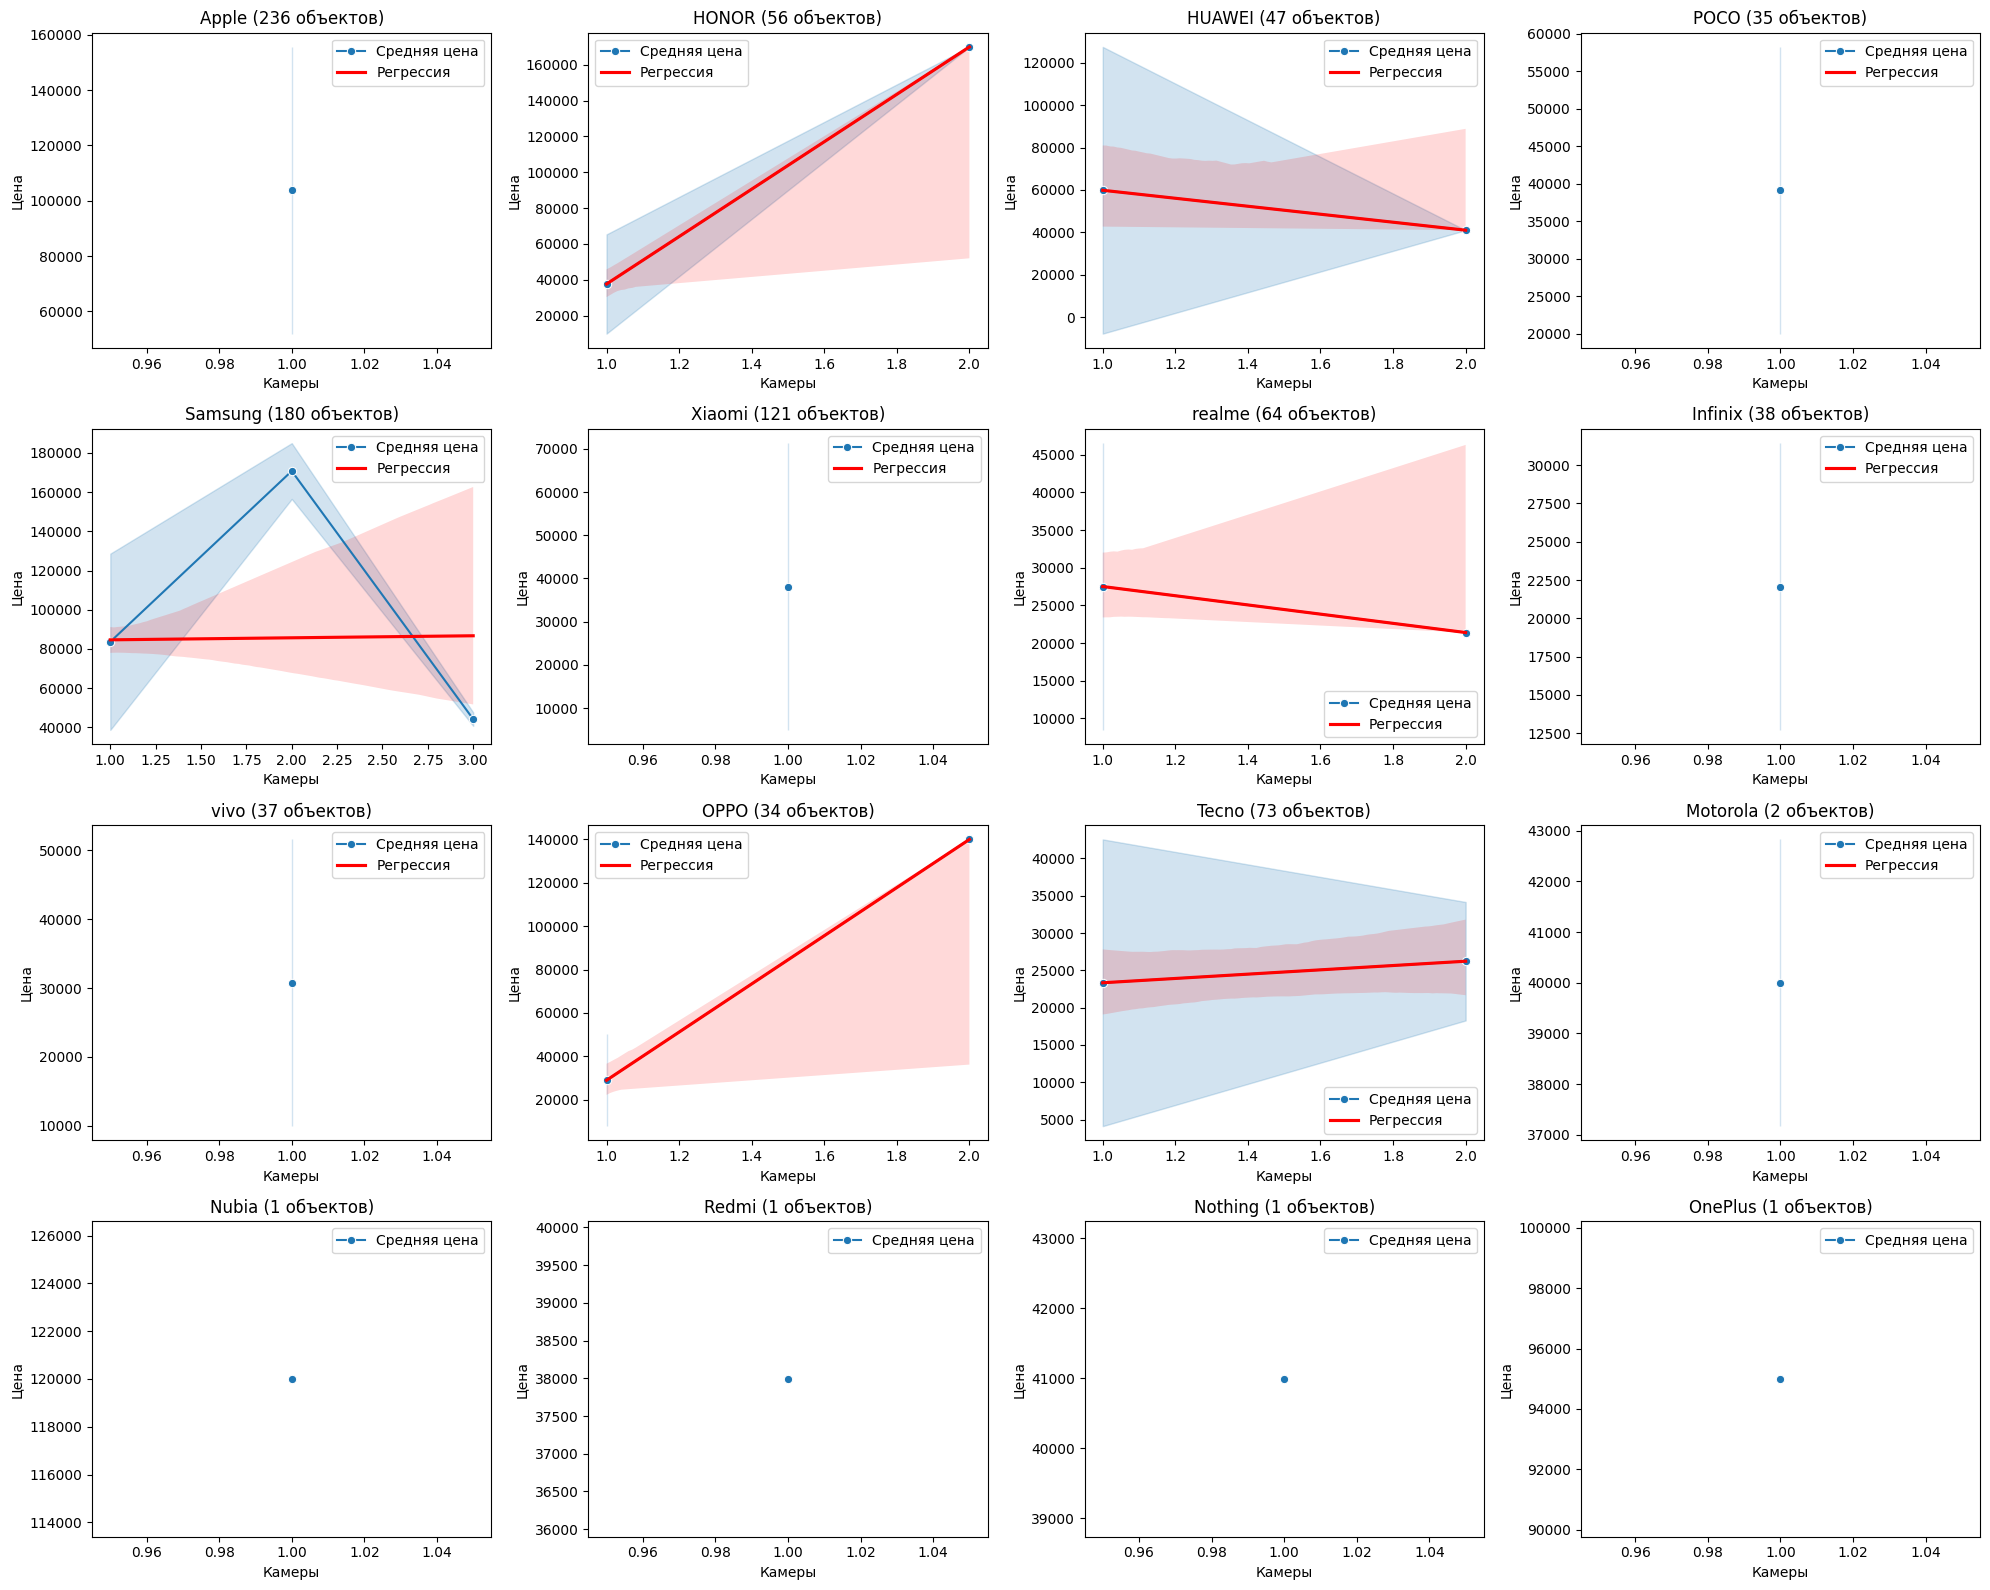

In [13]:
df = data[['brand', 'Количество фронтальных камер (шт)', 'salePrice']].dropna()

brands = df['brand'].unique()

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, brand in enumerate(brands):
    ax = axes[i]
    brand_df = df[df['brand'] == brand]
    count = len(brand_df)

    sns.lineplot(
        data=brand_df,
        x='Количество фронтальных камер (шт)',
        y='salePrice',
        ax=ax,
        ci='sd',
        marker='o',
        label='Средняя цена'
    )

    sns.regplot(
        data=brand_df,
        x='Количество фронтальных камер (шт)',
        y='salePrice',
        ax=ax,
        scatter=False,
        color='red',
        label='Регрессия'
    )

    ax.set_title(f'{brand} ({count} объектов)')
    ax.set_xlabel('Камеры')
    ax.set_ylabel('Цена')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Порт USB

In [14]:
df = data[['Порт USB', 'salePrice']]
print(df['Порт USB'].isna().sum())
df['Порт USB'].unique()

18


array(['Lightning', 'USB Type-C', 'Type-C USB 2.0',
       '1 х тип А /1 х USB Type C', nan, 'Type-C USB 3.2',
       'Type-C USB 3.0', 'USB 2.0'], dtype=object)

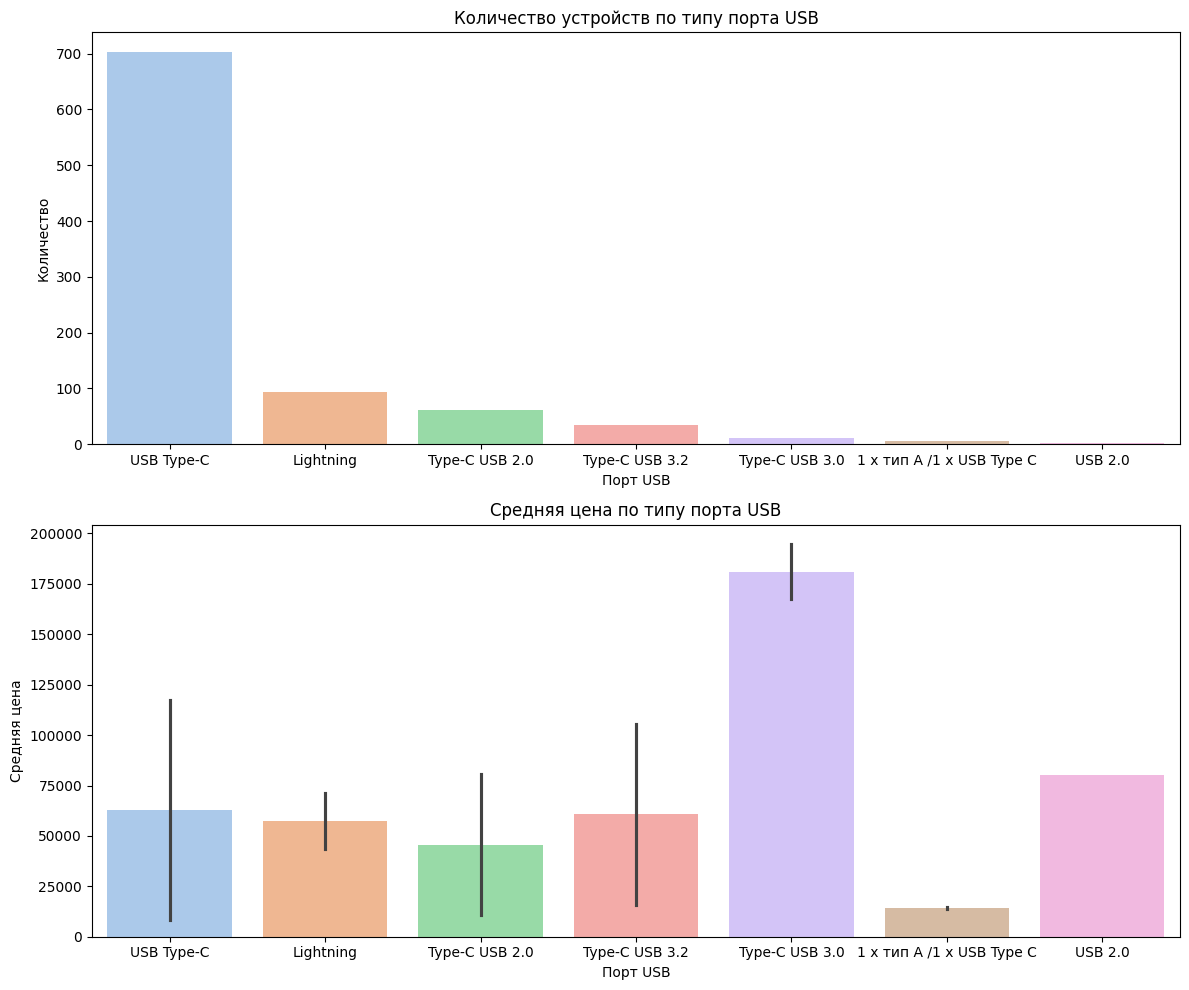

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(
    data=df,
    x='Порт USB',
    ax=axes[0],
    order=df['Порт USB'].value_counts().index,
    palette='pastel'
)
axes[0].set_title('Количество устройств по типу порта USB')
axes[0].set_xlabel('Порт USB')
axes[0].set_ylabel('Количество')

sns.barplot(
    data=df,
    x='Порт USB',
    y='salePrice',
    ax=axes[1],
    order=df['Порт USB'].value_counts().index,
    estimator='mean',
    ci='sd',
    palette='pastel'
)
axes[1].set_title('Средняя цена по типу порта USB')
axes[1].set_xlabel('Порт USB')
axes[1].set_ylabel('Средняя цена')

plt.tight_layout()
plt.show()

Год релиза

In [16]:
df = data[['Год релиза', 'salePrice']]
print(df['Год релиза'].isna().sum())
df.groupby('Год релиза').count()

39


,salePrice
Год релиза,
2018.0,2
2019.0,6
2020.0,8
2021.0,29
2022.0,55
2023.0,153
2024.0,479
2025.0,156
2028.0,2


In [17]:
df = data[['Год релиза', 'salePrice']]
print(df['Год релиза'].isna().sum())
df.groupby('Год релиза').count()

39


,salePrice
Год релиза,
2018.0,2
2019.0,6
2020.0,8
2021.0,29
2022.0,55
2023.0,153
2024.0,479
2025.0,156
2028.0,2


In [18]:
data['Год релиза'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
df = data[['Год релиза', 'salePrice']]

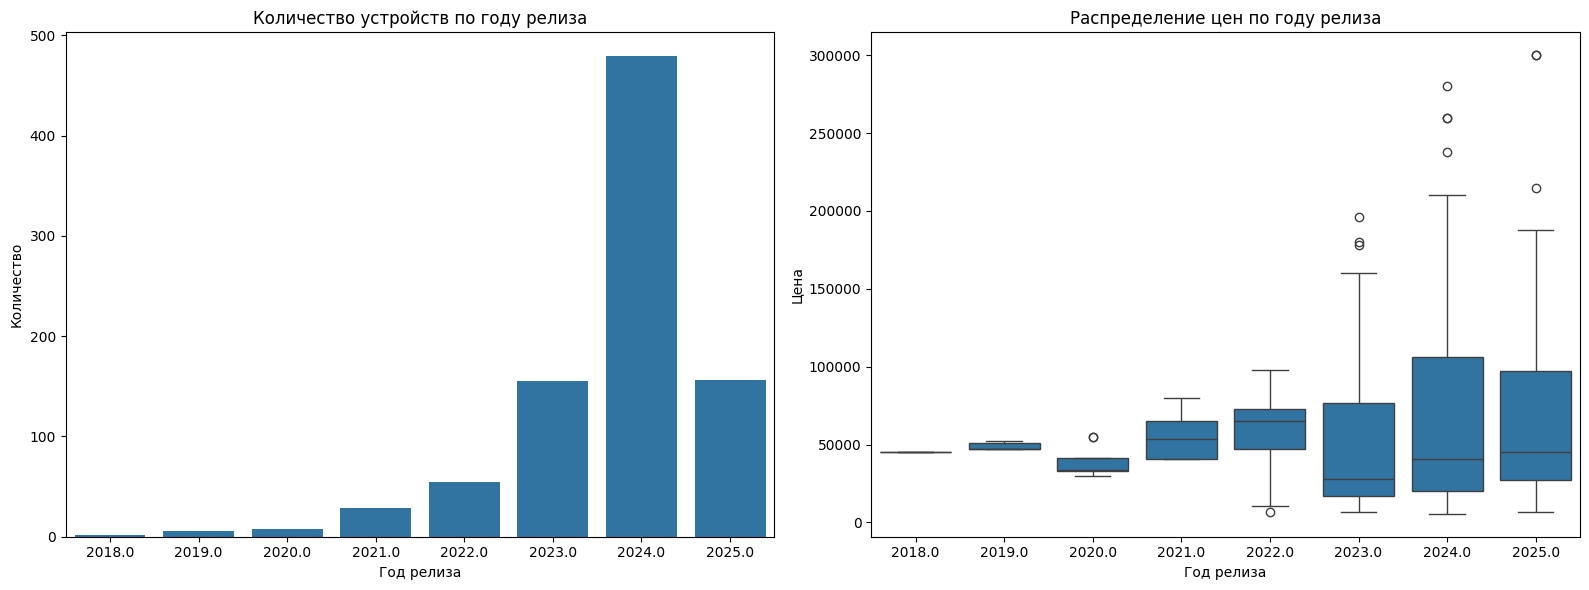

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(
    data=df,
    x='Год релиза',
    ax=axes[0],
    order=sorted(df['Год релиза'].dropna().unique(), key=lambda x: float(x))
)
axes[0].set_title('Количество устройств по году релиза')
axes[0].set_xlabel('Год релиза')
axes[0].set_ylabel('Количество')

sns.boxplot(
    data=df,
    x='Год релиза',
    y='salePrice',
    ax=axes[1],
    order=sorted(df['Год релиза'].dropna().unique(), key=lambda x: float(x))
)
axes[1].set_title('Распределение цен по году релиза')
axes[1].set_xlabel('Год релиза')
axes[1].set_ylabel('Цена')

plt.tight_layout()
plt.show()

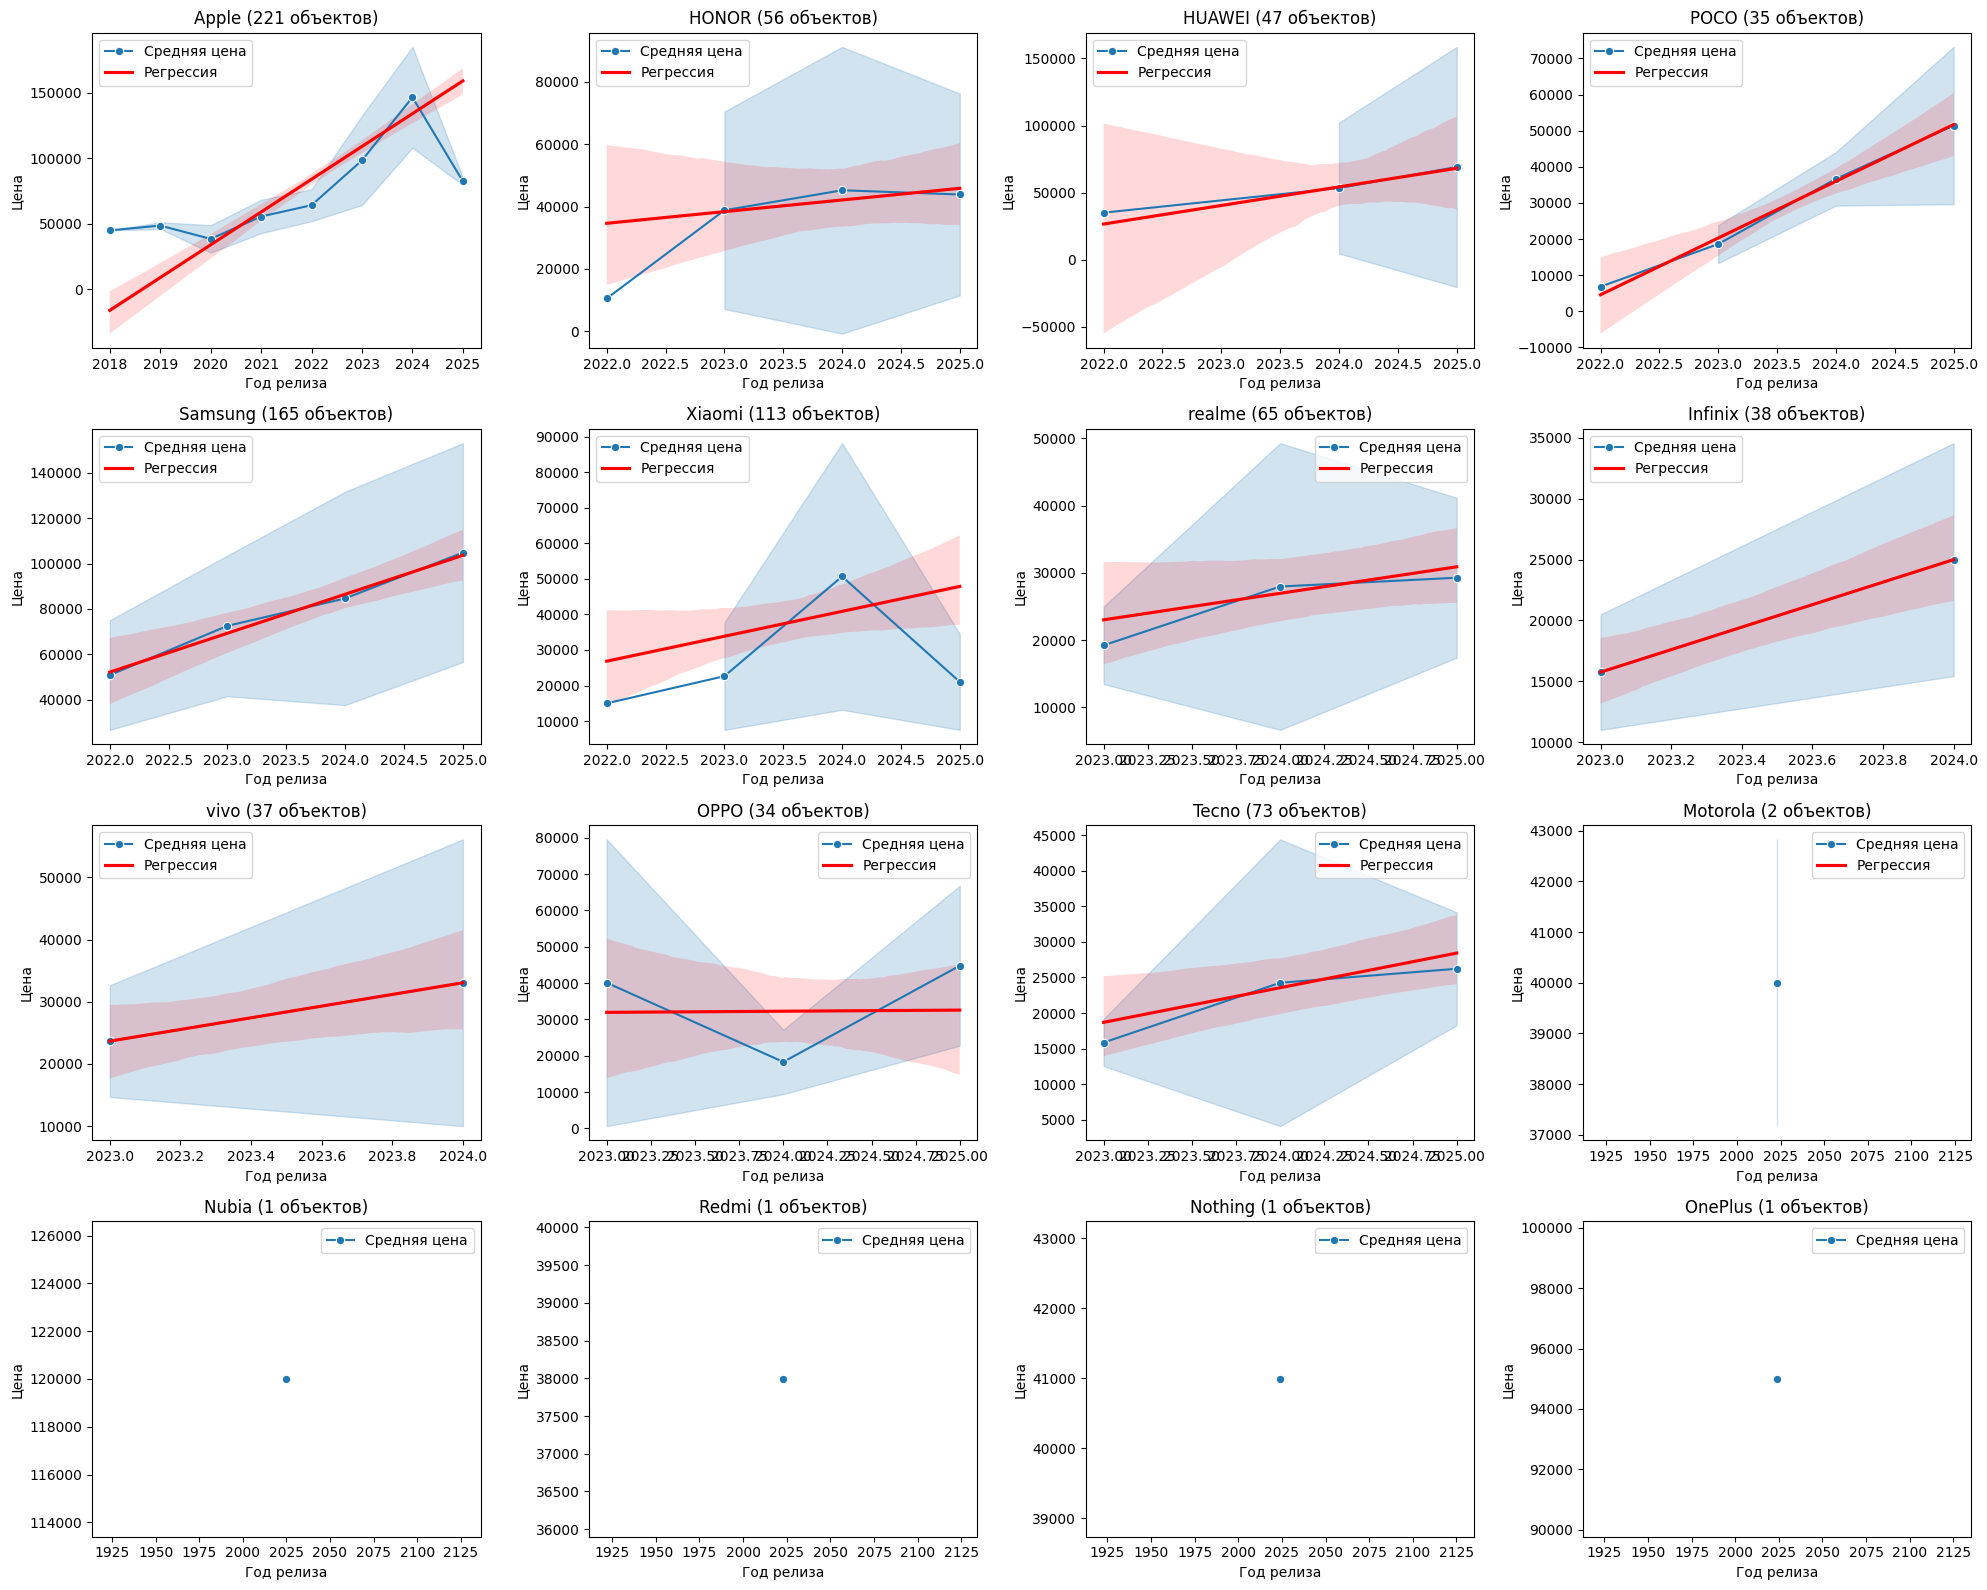

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = data[['brand', 'Год релиза', 'salePrice']].dropna()
df['Год релиза'] = pd.to_numeric(df['Год релиза'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')

brands = df['brand'].unique()
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, brand in enumerate(brands):
    ax = axes[i]
    brand_df = df[df['brand'] == brand]
    count = len(brand_df)

    sns.lineplot(
        data=brand_df,
        x='Год релиза',
        y='salePrice',
        ax=ax,
        ci='sd',
        marker='o',
        label='Средняя цена'
    )

    sns.regplot(
        data=brand_df,
        x='Год релиза',
        y='salePrice',
        ax=ax,
        scatter=False,
        color='red',
        label='Регрессия'
    )

    ax.set_title(f'{brand} ({count} объектов)')
    ax.set_xlabel('Год релиза')
    ax.set_ylabel('Цена')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
phones_2022_5 = = data[data['Год data[data['Год ре
print(phones_2022_5[['name', 'brand', 'brand', 'Год 'Год релиза', релиза', 'salePrice']]) 'salePrice']])лиза'] релиза'] == == 2022.5] 2022.5]

In [24]:
phones_2022_5 = data[data['Год релиза'] == 2022.5]
print(phones_2022_5[['name', 'brand', 'Год релиза', 'salePrice']])

Empty DataFrame
Columns: [name, brand, Год релиза, salePrice]
Index: []


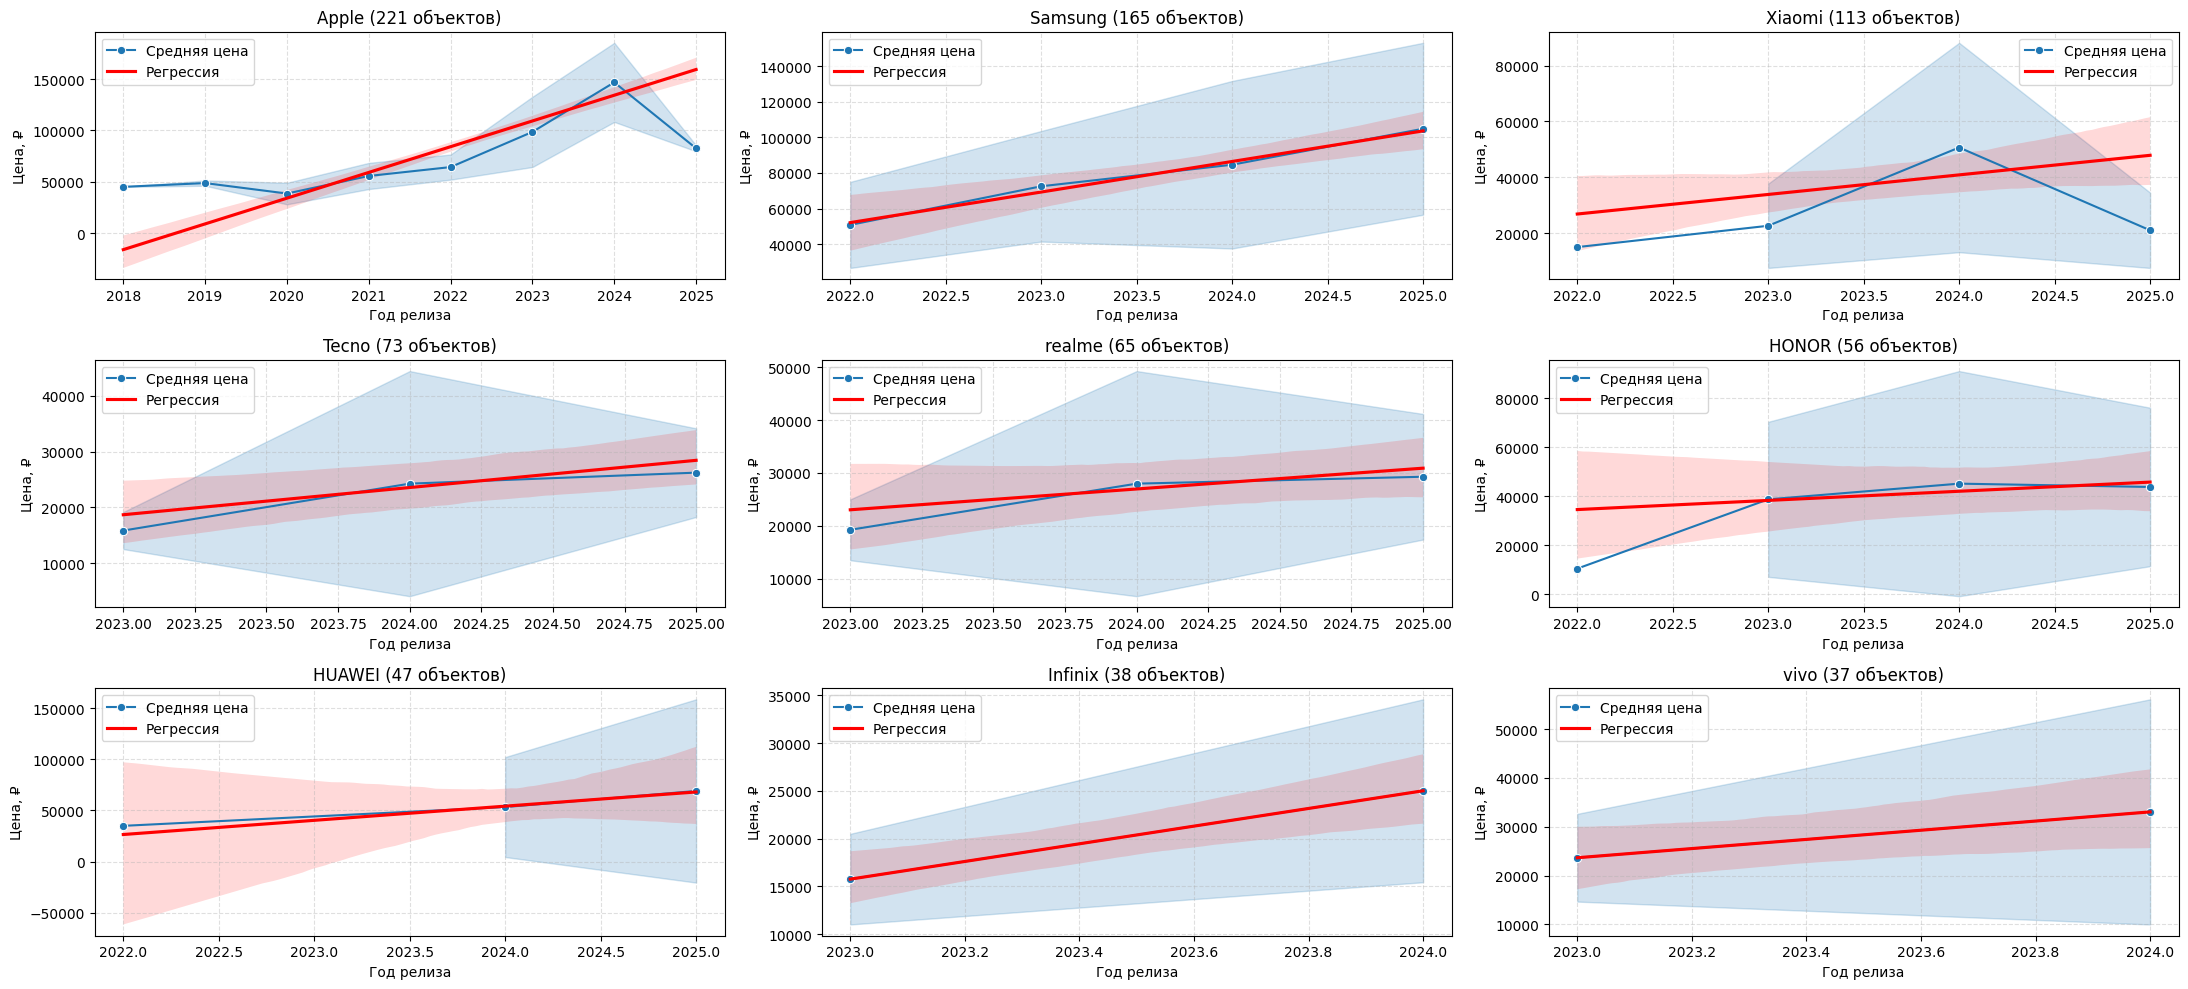

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Подготовка данных
df = data[['brand', 'Год релиза', 'salePrice']].dropna()
df['Год релиза'] = pd.to_numeric(df['Год релиза'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')

# Выбор топ-8 брендов по числу записей
top_8_brands = df['brand'].value_counts().head(9).index
df_top = df[df['brand'].isin(top_8_brands)]

# Построение графиков
fig, axes = plt.subplots(3, 3, figsize=(22, 10))  # 8 брендов = 2 строки по 4 графика
axes = axes.flatten()

for i, brand in enumerate(top_8_brands):
    ax = axes[i]
    brand_df = df_top[df_top['brand'] == brand]
    count = len(brand_df)

    sns.lineplot(
        data=brand_df,
        x='Год релиза',
        y='salePrice',
        ax=ax,
        ci='sd',
        marker='o',
        label='Средняя цена'
    )

    sns.regplot(
        data=brand_df,
        x='Год релиза',
        y='salePrice',
        ax=ax,
        scatter=False,
        color='red',
        label='Регрессия'
    )

    ax.set_title(f'{brand} ({count} объектов)')
    ax.set_xlabel('Год релиза')
    ax.set_ylabel('Цена, ₽')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
features = ['memory', '']

Поддержка быстрой зарядки 

In [ ]:
df = data[['Поддержка быстрой зарядки', 'salePrice']]
print(df['Поддержка быстрой зарядки'].isna().sum())
df.groupby('Поддержка быстрой зарядки').count()

50


,salePrice
Поддержка быстрой зарядки,
Да,879


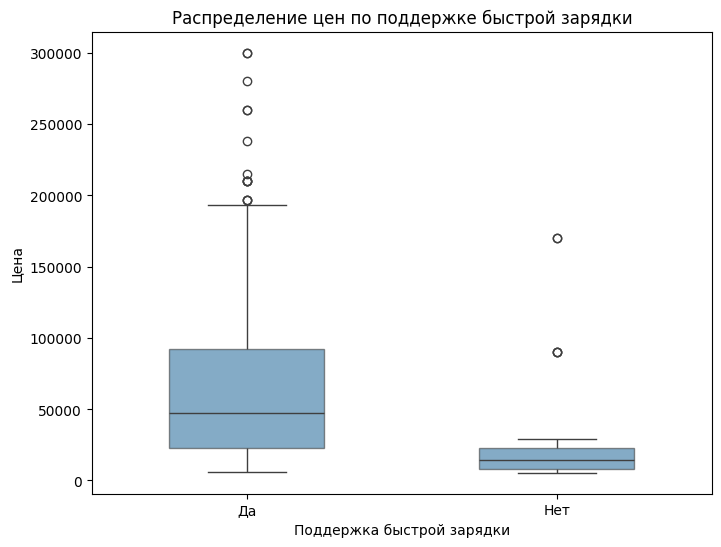

In [ ]:
df['Поддержка быстрой зарядки'] = df['Поддержка быстрой зарядки'].fillna('Нет')

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Поддержка быстрой зарядки',
    y='salePrice',
    width=0.5,
    boxprops=dict(alpha=0.6)
)
plt.xlabel('Поддержка быстрой зарядки')
plt.ylabel('Цена')
plt.title('Распределение цен по поддержке быстрой зарядки')
plt.show()

Сенсор распознавания лица

In [ ]:
df = data[['Сенсор распознавания лица', 'salePrice']]
print(df['Сенсор распознавания лица'].isna().sum())
df.groupby('Сенсор распознавания лица').count()

213


,salePrice
Сенсор распознавания лица,
Да,716


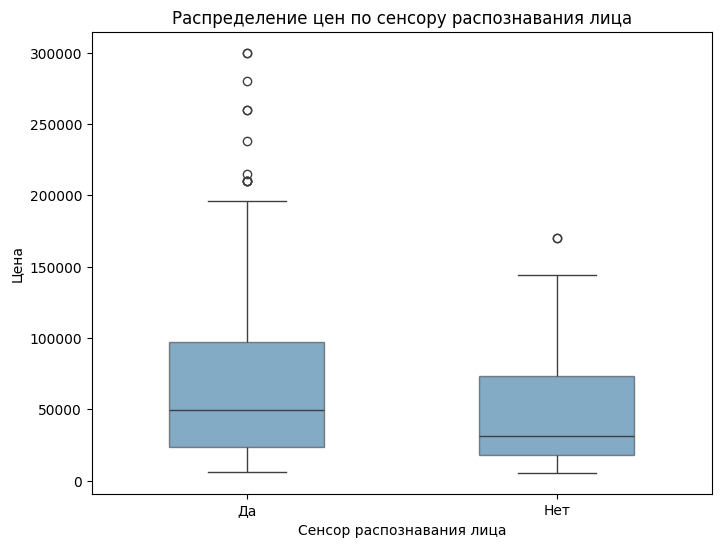

In [ ]:
df['Сенсор распознавания лица'] = df['Сенсор распознавания лица'].fillna('Нет')

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Сенсор распознавания лица',
    y='salePrice',
    width=0.5,
    boxprops=dict(alpha=0.6)
)
plt.xlabel('Сенсор распознавания лица')
plt.ylabel('Цена')
plt.title('Распределение цен по сенсору распознавания лица')
plt.show()

Емкость аккамулятора

In [ ]:
df = data[['Емкость аккумулятора (мАч)', 'salePrice']]
print(df['Емкость аккумулятора (мАч)'].isna().sum())
df.groupby('Емкость аккумулятора (мАч)').count()

236


,salePrice
Емкость аккумулятора (мАч),
3700.0,3
3800.0,2
3900.0,8
4000.0,28
4300.0,2
4400.0,5
4500.0,23
4600.0,8
4610.0,3


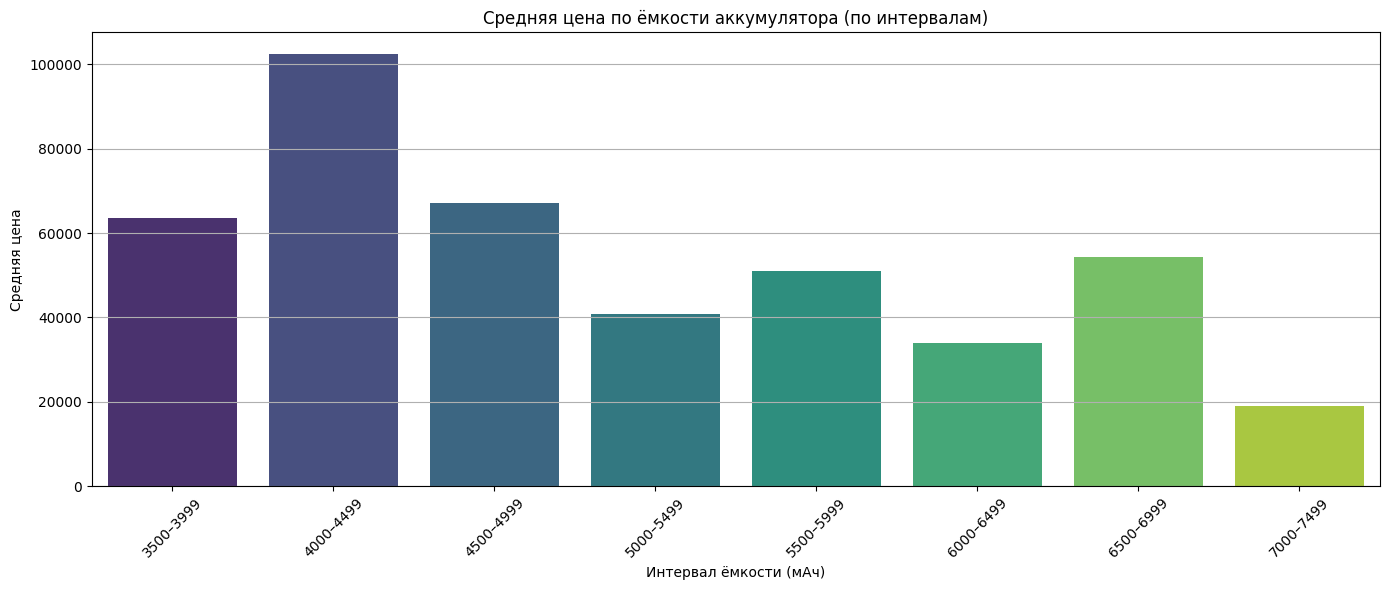

In [ ]:
df = data[['Емкость аккумулятора (мАч)', 'salePrice']].copy()
df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')
df = df.dropna()

bin_size = 500
df['battery_bin'] = (df['Емкость аккумулятора (мАч)'] // bin_size * bin_size).astype(int)
df['battery_range'] = df['battery_bin'].astype(str) + '–' + (df['battery_bin'] + bin_size - 1).astype(str)

grouped = df.groupby(['battery_bin', 'battery_range'])['salePrice'].mean().reset_index()

grouped = grouped.sort_values('battery_bin')

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, 
            x='battery_range', 
            y='salePrice', 
            palette='viridis')

plt.title('Средняя цена по ёмкости аккумулятора (по интервалам)')
plt.xlabel('Интервал ёмкости (мАч)')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


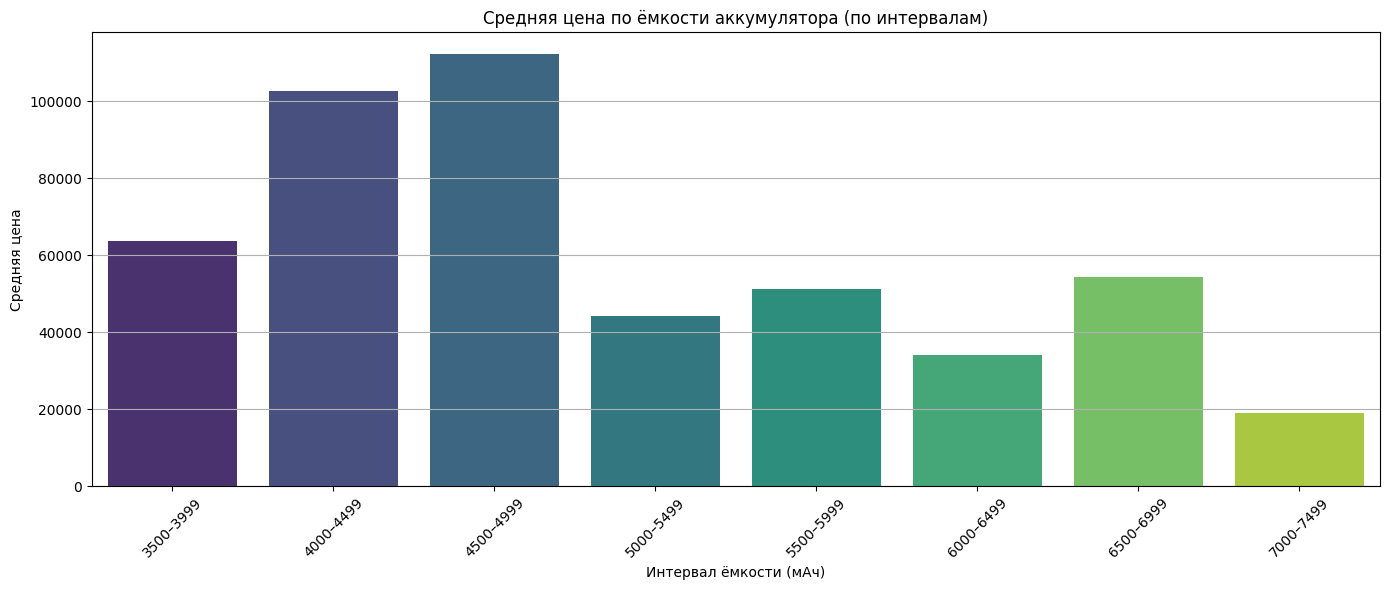

In [ ]:
df = data[['Емкость аккумулятора (мАч)', 'salePrice']].copy()
known = df[df['Емкость аккумулятора (мАч)'].notna()]
unknown = df[df['Емкость аккумулятора (мАч)'].isna()]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(known[['salePrice']], known['Емкость аккумулятора (мАч)'])


df.loc[df['Емкость аккумулятора (мАч)'].isna(), 'Емкость аккумулятора (мАч)'] = \
    reg.predict(unknown[['salePrice']])

df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')
df = df.dropna()

bin_size = 500
df['battery_bin'] = (df['Емкость аккумулятора (мАч)'] // bin_size * bin_size).astype(int)
df['battery_range'] = df['battery_bin'].astype(str) + '–' + (df['battery_bin'] + bin_size - 1).astype(str)

grouped = df.groupby(['battery_bin', 'battery_range'])['salePrice'].mean().reset_index()

grouped = grouped.sort_values('battery_bin')

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='battery_range', y='salePrice', palette='viridis')

plt.title('Средняя цена по ёмкости аккумулятора (по интервалам)')
plt.xlabel('Интервал ёмкости (мАч)')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
df = data[['Емкость аккумулятора (мАч)', 'salePrice']].copy()
df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')
df = df.dropna()


In [ ]:
apple_battery = data[data['brand'].str.lower() == 'apple'][['name', 'Емкость аккумулятора (мАч)']]
print(apple_battery)

                                                  name  \
0    Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...   
3    Смартфон Apple iPhone 16 Pro 256GB Desert Tita...   
10   Смартфон Apple iPhone 16 Pro Max 256GB Black T...   
11   Смартфон Apple iPhone 16 Pro Max 256GB Desert ...   
12   Смартфон Apple iPhone 16 Pro Max 256GB Natural...   
..                                                 ...   
919  Смартфон Apple iPhone 15 Pro Max 256GB Blue Ti...   
921  Смартфон Apple iPhone 16 Pro 128GB nanoSim/eSi...   
924  Смартфон Apple iPhone 15 Pro 1TB nanoSim/eSim ...   
925  Смартфон Apple iPhone 16 Pro 256GB nanoSim/eSi...   
928  Смартфон Apple iPhone 16 Plus 256GB nanoSim/eS...   

    Емкость аккумулятора (мАч)  
0                         <NA>  
3                         <NA>  
10                        <NA>  
11                        <NA>  
12                        <NA>  
..                         ...  
919                       <NA>  
921                       <NA>  
924   

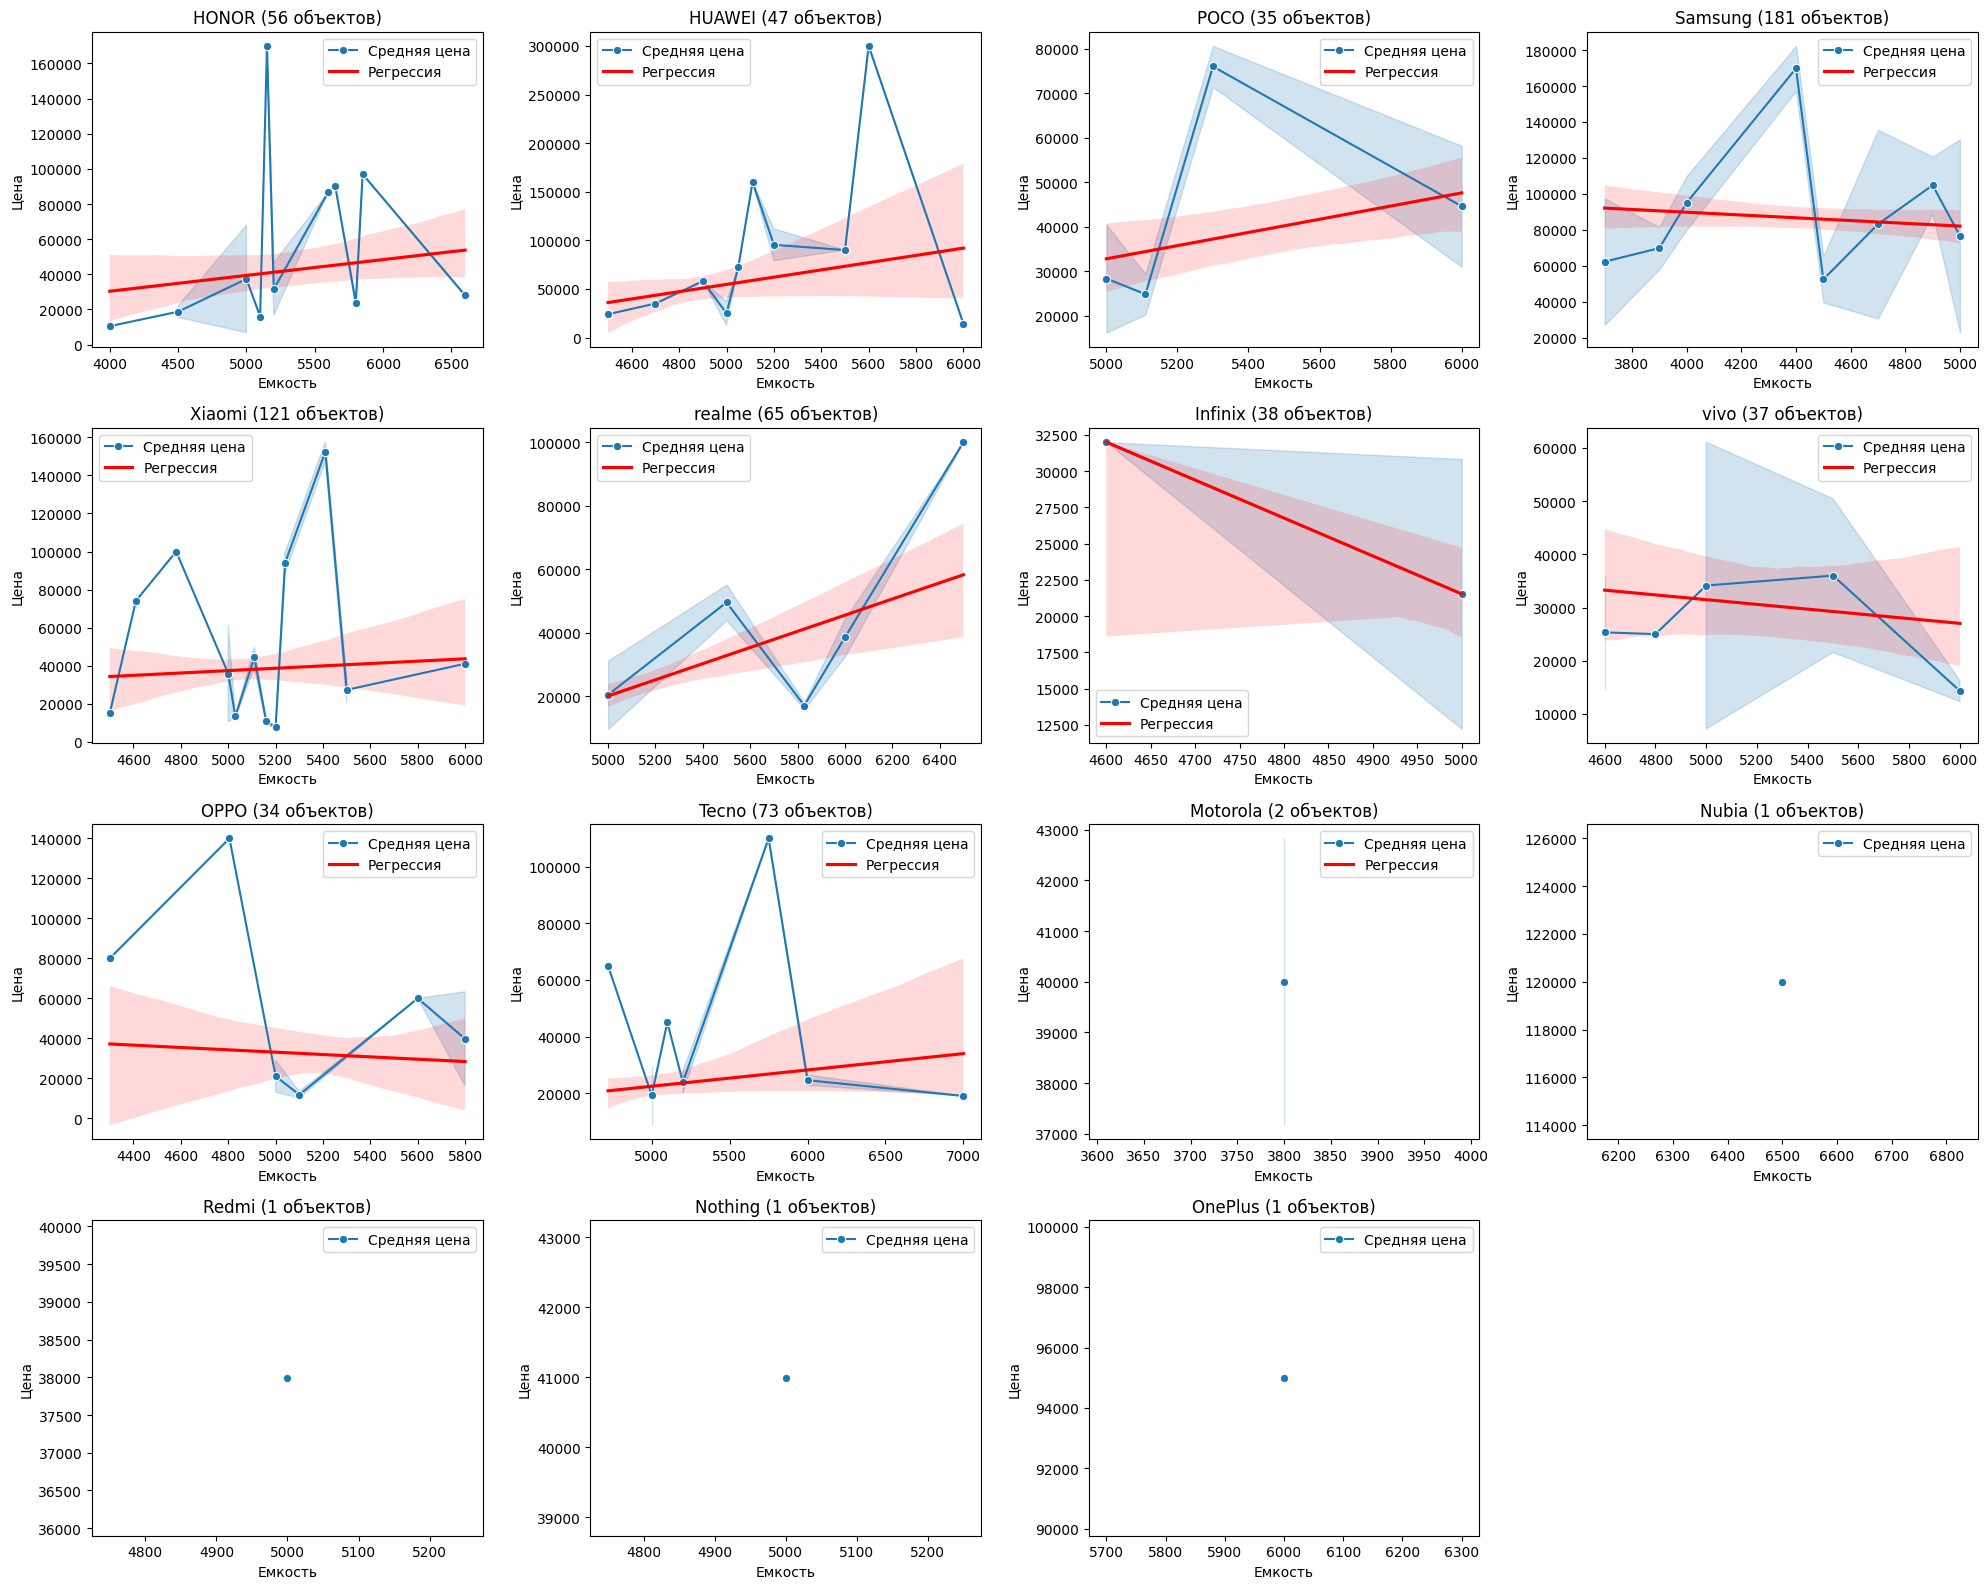

In [ ]:
df = data[['brand', 'Емкость аккумулятора (мАч)', 'salePrice']].dropna()

brands = df['brand'].unique()

df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, brand in enumerate(brands):
    ax = axes[i]
    brand_df = df[df['brand'] == brand]
    count = len(brand_df)

    sns.lineplot(
        data=brand_df,
        x='Емкость аккумулятора (мАч)',
        y='salePrice',
        ax=ax,
        ci='sd',
        marker='o',
        label='Средняя цена'
    )

    sns.regplot(
        data=brand_df,
        x='Емкость аккумулятора (мАч)',
        y='salePrice',
        ax=ax,
        scatter=False,
        color='red',
        label='Регрессия'
    )

    ax.set_title(f'{brand} ({count} объектов)')
    ax.set_xlabel('Емкость')
    ax.set_ylabel('Цена')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


У apple она вообще не стоит, но ее можно дозаполнить по модели 

In [ ]:
data[['Серия', 'Емкость аккумулятора (мАч)']]

,Серия,Емкость аккумулятора (мАч)
0,iPhone 13,NaN
1,X9c,6600.0
2,Pura 70 Pro,5050.0
3,iPhone 16 Pro,NaN
4,M6 Pro,5000.0
...,...,...
924,iPhone 15 Pro,NaN
925,iPhone 16 Pro,NaN
926,Samsung Galaxy S,4900.0
927,14T,5000.0


In [ ]:
df =  data[['Серия', 'Емкость аккумулятора (мАч)', 'salePrice', 'brand']]

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        for model, capacity in iphone_battery_capacity.items():
            if model in row['Серия']:
                return capacity
    return row['Емкость аккумулятора (мАч)']

df['Емкость аккумулятора (мАч)'] = df.apply(fill_iphone_capacity, axis=1)

In [ ]:
print(df['Емкость аккумулятора (мАч)'].isna().sum())
df.groupby('Емкость аккумулятора (мАч)').count()

3


,Серия,salePrice
Емкость аккумулятора (мАч),,
2815.0,8,8
2942.0,2,2
3095.0,7,7
3110.0,6,6
3200.0,19,19
3227.0,23,23
3274.0,12,12
3279.0,30,30
3349.0,28,28


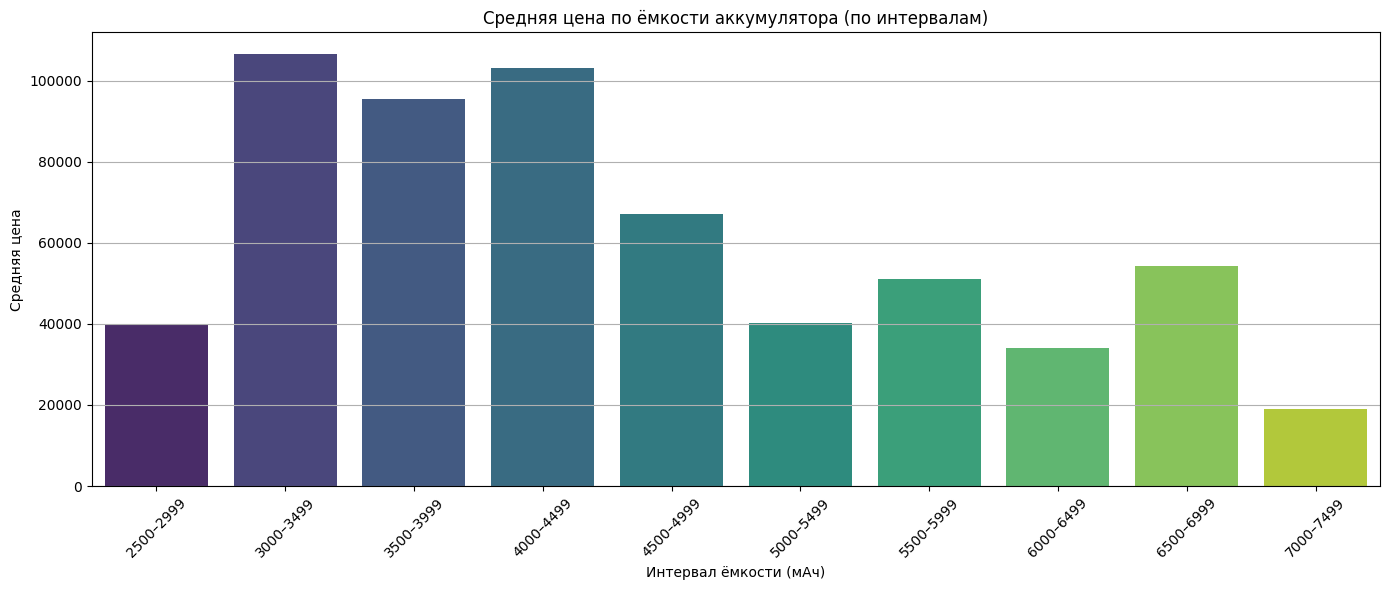

In [ ]:
known = df[df['Емкость аккумулятора (мАч)'].notna()]
unknown = df[df['Емкость аккумулятора (мАч)'].isna()]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(known[['salePrice']], known['Емкость аккумулятора (мАч)'])


df.loc[df['Емкость аккумулятора (мАч)'].isna(), 'Емкость аккумулятора (мАч)'] = \
    reg.predict(unknown[['salePrice']])

df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')
df = df.dropna()

bin_size = 500
df['battery_bin'] = (df['Емкость аккумулятора (мАч)'] // bin_size * bin_size).astype(int)
df['battery_range'] = df['battery_bin'].astype(str) + '–' + (df['battery_bin'] + bin_size - 1).astype(str)

grouped = df.groupby(['battery_bin', 'battery_range'])['salePrice'].mean().reset_index()

grouped = grouped.sort_values('battery_bin')

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='battery_range', y='salePrice', palette='viridis')

plt.title('Средняя цена по ёмкости аккумулятора (по интервалам)')
plt.xlabel('Интервал ёмкости (мАч)')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

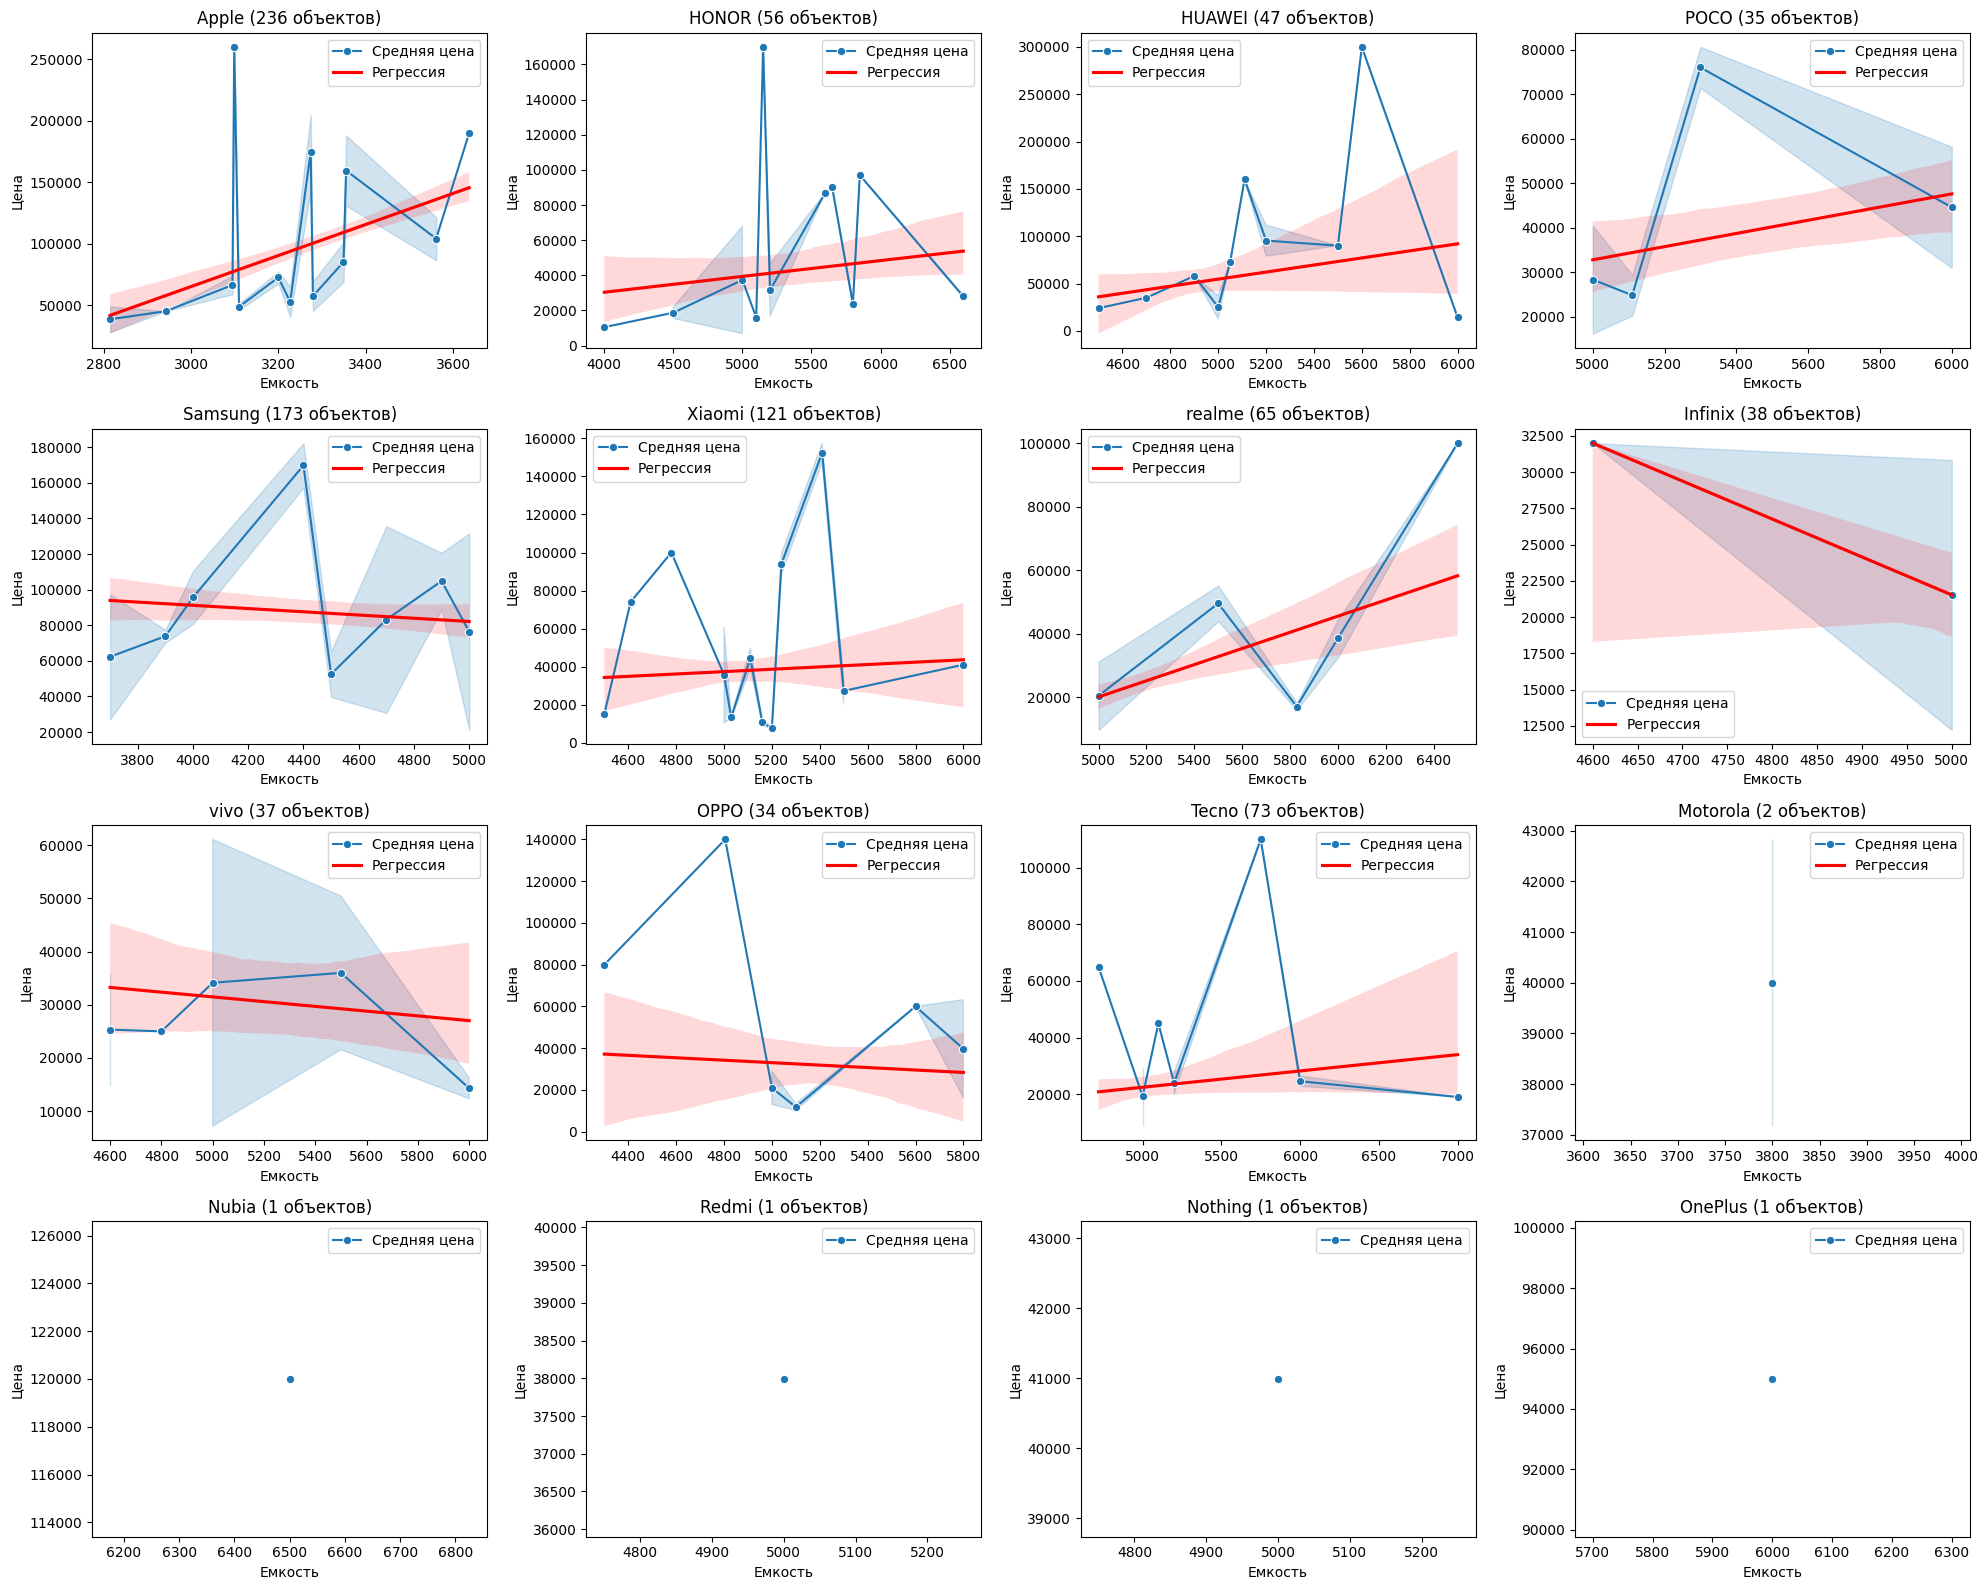

In [ ]:
brands = df['brand'].unique()

df['Емкость аккумулятора (мАч)'] = pd.to_numeric(df['Емкость аккумулятора (мАч)'], errors='coerce')
df['salePrice'] = pd.to_numeric(df['salePrice'], errors='coerce')

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, brand in enumerate(brands):
    ax = axes[i]
    brand_df = df[df['brand'] == brand]
    count = len(brand_df)

    sns.lineplot(
        data=brand_df,
        x='Емкость аккумулятора (мАч)',
        y='salePrice',
        ax=ax,
        ci='sd',
        marker='o',
        label='Средняя цена'
    )

    sns.regplot(
        data=brand_df,
        x='Емкость аккумулятора (мАч)',
        y='salePrice',
        ax=ax,
        scatter=False,
        color='red',
        label='Регрессия'
    )

    ax.set_title(f'{brand} ({count} объектов)')
    ax.set_xlabel('Емкость')
    ax.set_ylabel('Цена')
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Сканер отпечатка пальца

In [ ]:
df = data[['Сканер отпечатка пальца', 'salePrice', 'product_id']]
print(df['Сканер отпечатка пальца'].isna().sum())
df.groupby('Сканер отпечатка пальца').count()

264


,salePrice,product_id
Сканер отпечатка пальца,,
интегрирован в экран смартфона.,384,384
на задней панели,7,7
"на задней панели, интегрирован в экран смартфона.",1,1
"расположен в кнопке, либо боковой грани смартфона.",161,161
"расположен в кнопке, либо боковой грани смартфона., интегрирован в экран смартфона.",17,17
"расположен в кнопке, либо боковой грани смартфона., на задней панели, расположен на лицевой стороне смартфона, интегрирован в экран смартфона.",8,8
"расположен в кнопке, либо боковой грани смартфона., расположен на лицевой стороне смартфона",16,16
расположен на лицевой стороне смартфона,40,40
"расположен на лицевой стороне смартфона, интегрирован в экран смартфона.",31,31


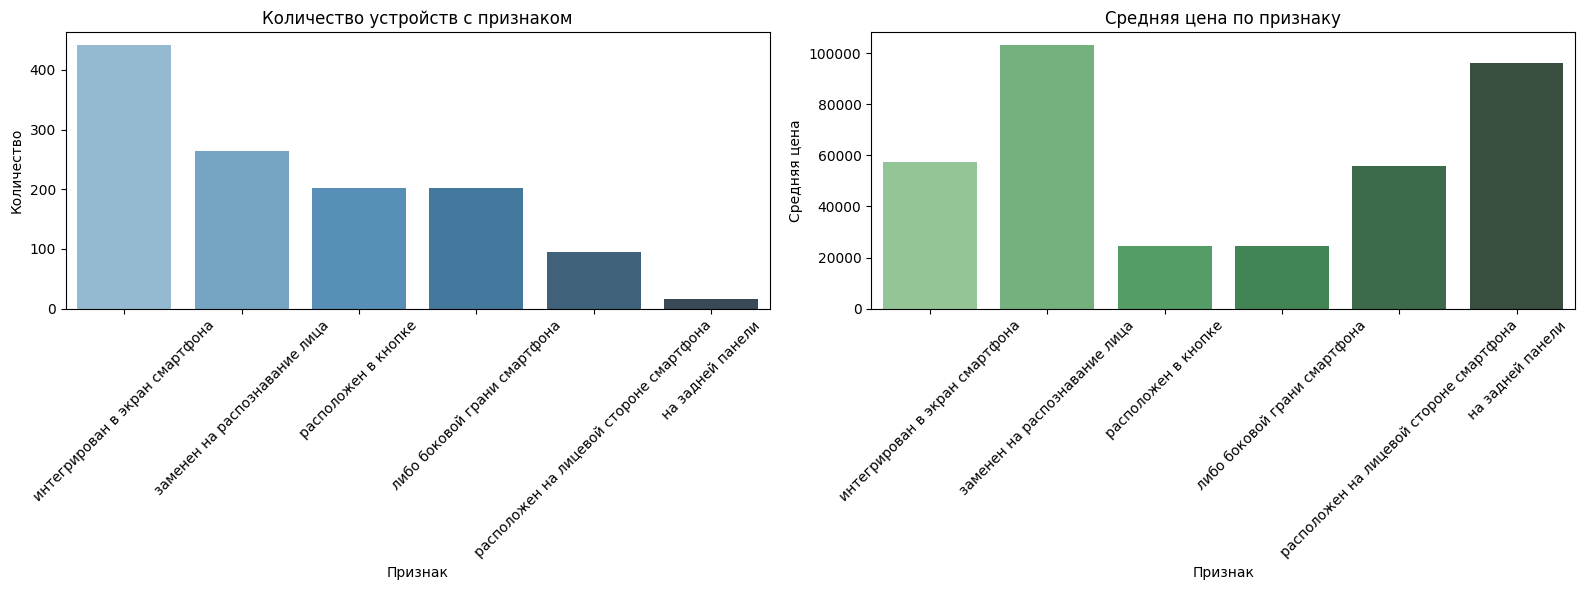

In [ ]:
from collections import Counter

df['Сканер отпечатка пальца'] = df['Сканер отпечатка пальца'].fillna('заменен на распознавание лица')
df['fingerprint_features'] = df['Сканер отпечатка пальца'].astype(str).str.replace(r'[.]', '', regex=True).str.split(', ')

all_features = df['fingerprint_features'].explode()
feature_counts = Counter(all_features)
feature_counts.pop('<NA>', None)
feature_counts.pop('nan', None)

feature_avg_price = {}
for feature in feature_counts:
    mask = df['fingerprint_features'].apply(lambda x: feature in x if isinstance(x, list) else False)
    feature_avg_price[feature] = df.loc[mask, 'salePrice'].mean()

plot_df = pd.DataFrame({
    'feature': list(feature_counts.keys()),
    'count': list(feature_counts.values()),
    'avg_price': [feature_avg_price[f] for f in feature_counts]
}).sort_values('count', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=plot_df, x='feature', y='count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Количество устройств с признаком')
axes[0].set_xlabel('Признак')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=plot_df, x='feature', y='avg_price', ax=axes[1], palette='Greens_d')
axes[1].set_title('Средняя цена по признаку')
axes[1].set_xlabel('Признак')
axes[1].set_ylabel('Средняя цена')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Сенсор распознавания лица

In [ ]:
df = data[['Сенсор распознавания лица', 'salePrice']]
print(df['Сенсор распознавания лица'].isna().sum())
df.groupby('Сенсор распознавания лица').count()

213


,salePrice
Сенсор распознавания лица,
Да,716


In [ ]:
df['Сенсор распознавания лица'] = df['Сенсор распознавания лица'].fillna('Нет')

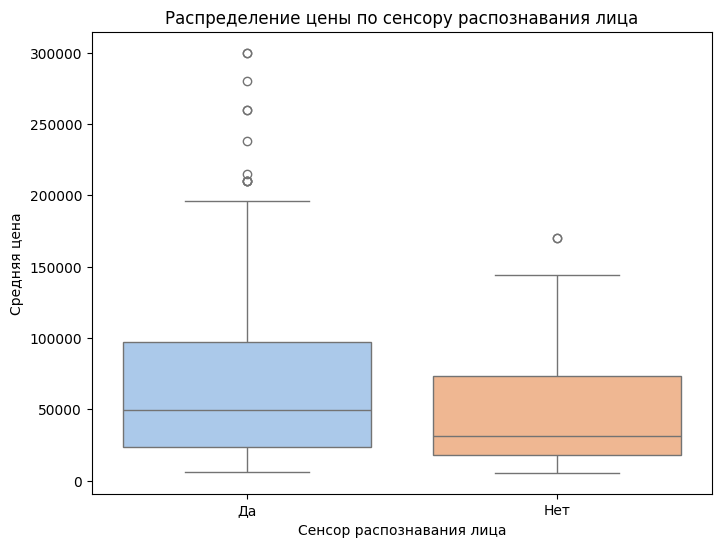

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Сенсор распознавания лица',
    y='salePrice',
    palette='pastel'
)
plt.xlabel('Сенсор распознавания лица')
plt.ylabel('Средняя цена')
plt.title('Распределение цены по сенсору распознавания лица')
plt.show()

Тип экрана

In [ ]:
df = data[['Безрамочный', 'salePrice']]
print(df['Безрамочный'].isna().sum())
df.groupby('Безрамочный').count()

414


,salePrice
Безрамочный,
Да,515


In [ ]:
df['Безрамочный'] = df['Безрамочный'].fillna('Нет')

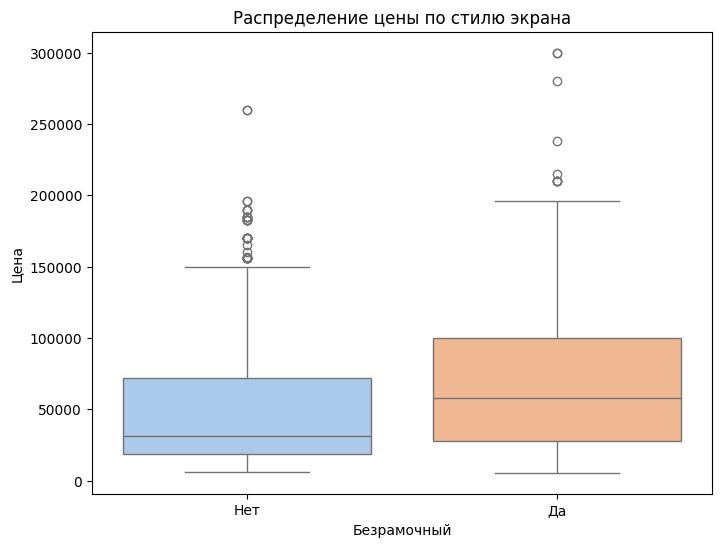

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Безрамочный',
    y='salePrice',
    palette='pastel'
)
plt.xlabel('Безрамочный')
plt.ylabel('Цена')
plt.title('Распределение цены по стилю экрана')
plt.show()

Поддержка безпроводной зарядки

In [ ]:
df = data[['Поддержка беспроводной зарядки', 'salePrice']]
print(df['Поддержка беспроводной зарядки'].isna().sum())
df.groupby('Поддержка беспроводной зарядки').count()

489


,salePrice
Поддержка беспроводной зарядки,
Да,440


In [ ]:
df['Поддержка беспроводной зарядки'] = df['Поддержка беспроводной зарядки'].fillna('Нет')

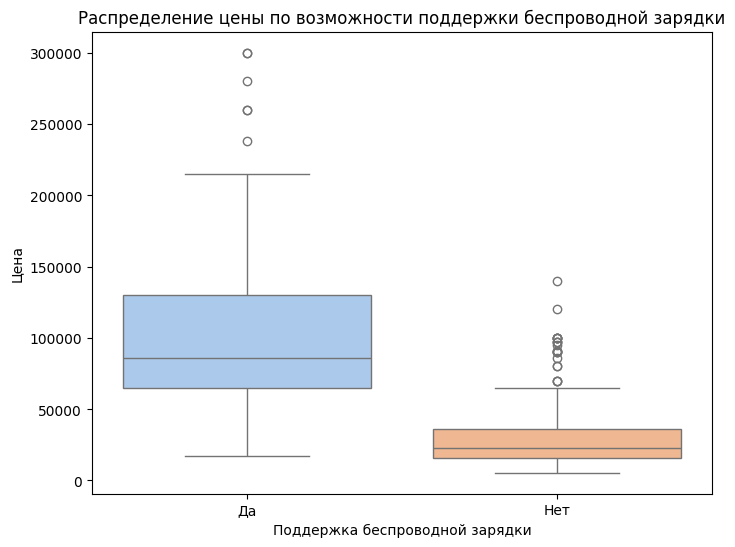

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Поддержка беспроводной зарядки',
    y='salePrice',
    palette='pastel'
)
plt.xlabel('Поддержка беспроводной зарядки')
plt.ylabel('Цена')
plt.title('Распределение цены по возможности поддержки беспроводной зарядки')
plt.show()

Обратная беспроводная зарядка

In [ ]:
df = data[['Обратная беспроводная зарядка', 'salePrice']]
print(df['Обратная беспроводная зарядка'].isna().sum())
df.groupby('Обратная беспроводная зарядка').count()

763


,salePrice
Обратная беспроводная зарядка,
Да,166


In [ ]:
df['Обратная беспроводная зарядка'] = df['Обратная беспроводная зарядка'].fillna('Нет')

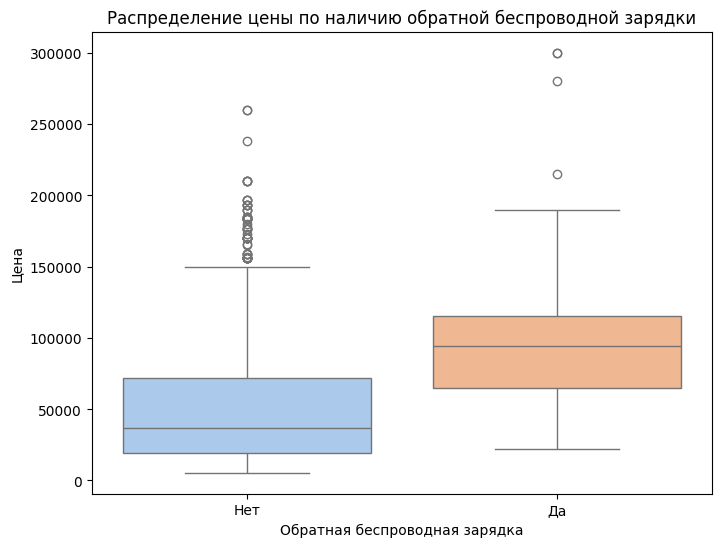

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Обратная беспроводная зарядка',
    y='salePrice',
    palette='pastel'
)
plt.xlabel('Обратная беспроводная зарядка')
plt.ylabel('Цена')
plt.title('Распределение цены по наличию обратной беспроводной зарядки')
plt.show()

In [ ]:
df = data[['Чехол', 'salePrice', 'brand']]
print(df['Чехол'].isna().sum())
df.groupby('Чехол').count()

565


,salePrice,brand
Чехол,,
Да,364,364


In [ ]:
df_brands = df.groupby('brand').count()
brands = df_brands.index[df_brands['Чехол'] != 0]
brands

Index(['HONOR', 'HUAWEI', 'Infinix', 'Nubia', 'OPPO', 'POCO', 'Redmi', 'Tecno',
       'Xiaomi', 'realme', 'vivo'],
      dtype='object', name='brand')

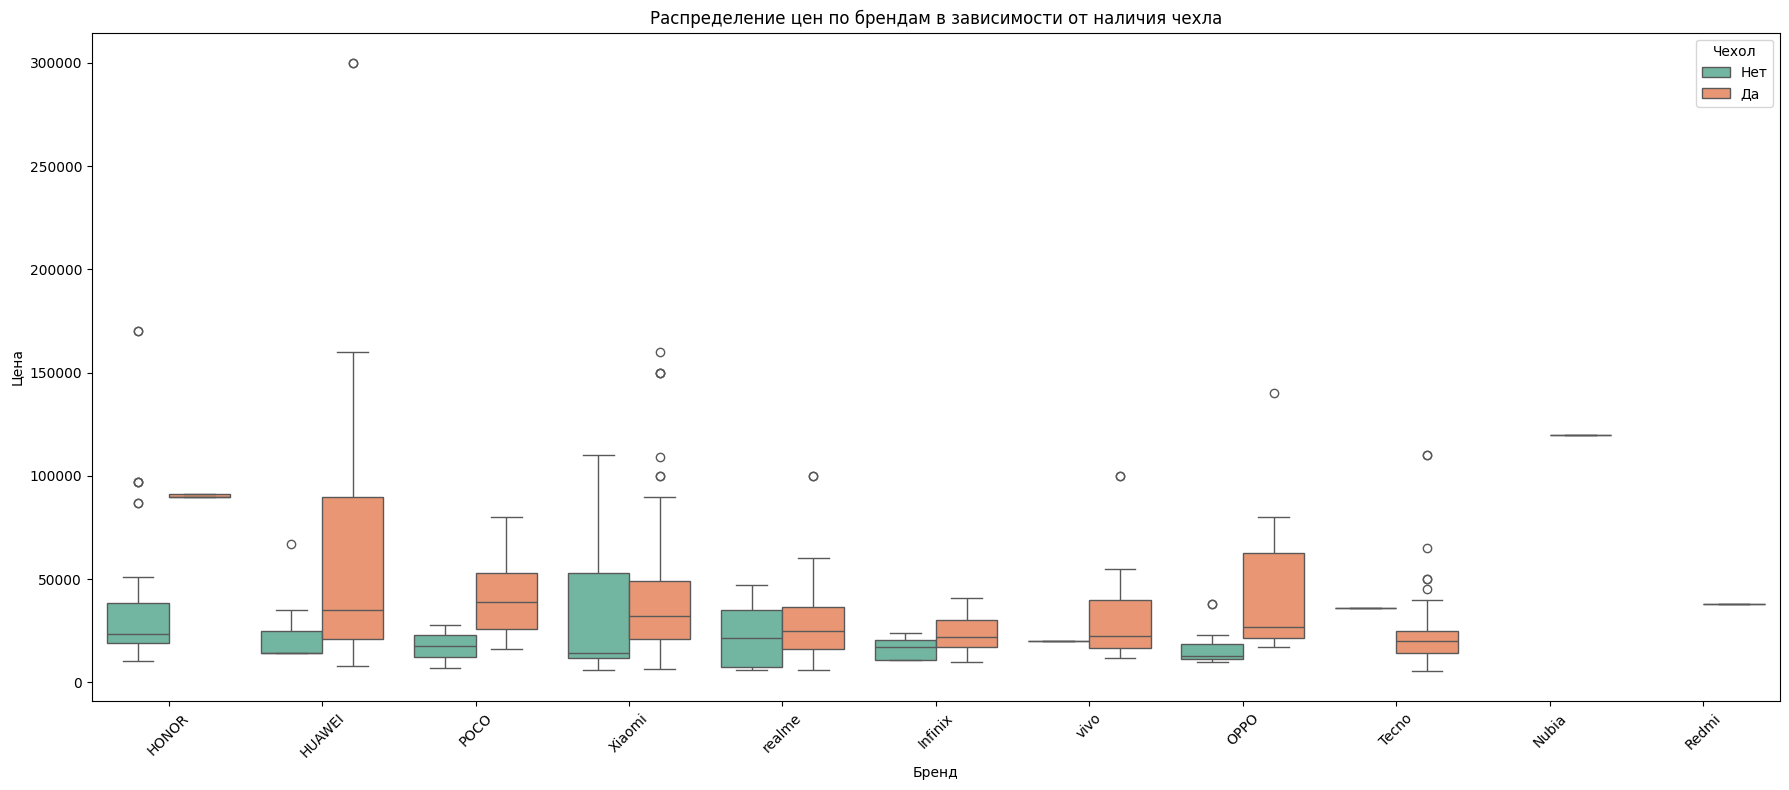

In [ ]:
filtered_df = df[df['brand'].isin(brands)]

filtered_df['Чехол'] = filtered_df['Чехол'].fillna('Нет')

plt.figure(figsize=(18, 8))
sns.boxplot(
    data=filtered_df,
    x='brand',
    y='salePrice',
    hue='Чехол',
    palette='Set2'
)
plt.xlabel('Бренд')
plt.ylabel('Цена')
plt.title('Распределение цен по брендам в зависимости от наличия чехла')
plt.legend(title='Чехол')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df = data[['Сканер LiDAR', 'salePrice', 'brand']]
print(df['Сканер LiDAR'].isna().sum())
df.groupby('Сканер LiDAR').count()

780


,salePrice,brand
Сканер LiDAR,,
Да,149,149


In [ ]:
df_brands = df.groupby('brand').count()
df_brands

,Сканер LiDAR,salePrice
brand,,
Apple,149,236
HONOR,0,56
HUAWEI,0,47
Infinix,0,38
Motorola,0,2
Nothing,0,1
Nubia,0,1
OPPO,0,34
OnePlus,0,1


In [ ]:
brand = 'Apple'

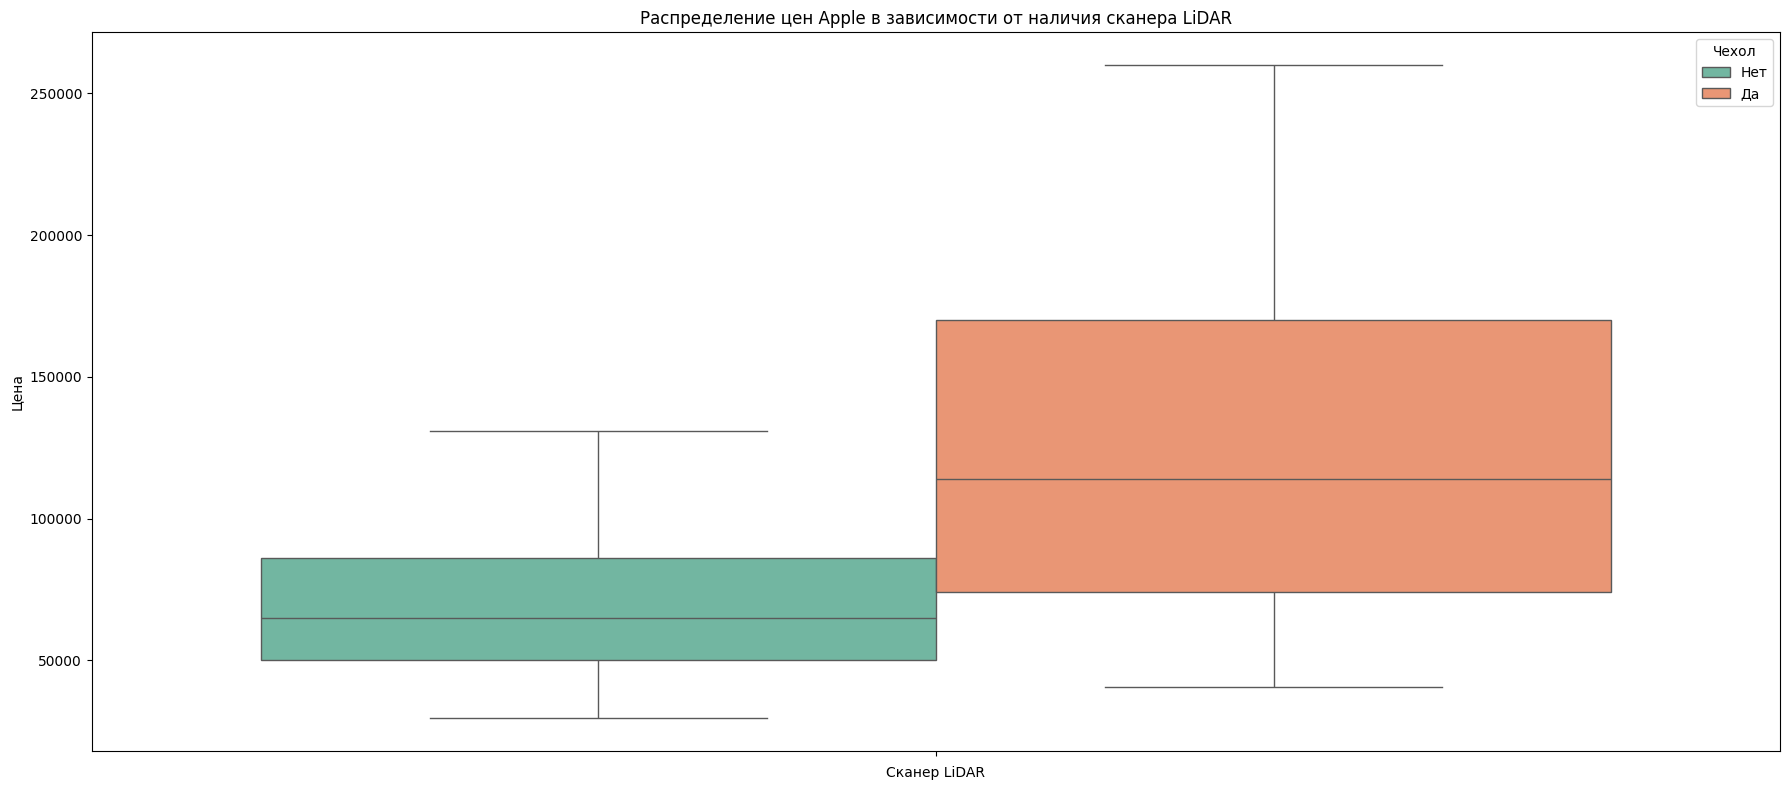

In [ ]:
filtered_df = df[df['brand'] == brand]

filtered_df['Сканер LiDAR'] = filtered_df['Сканер LiDAR'].fillna('Нет')

plt.figure(figsize=(18, 8))
sns.boxplot(
    data=filtered_df,
    y='salePrice',
    hue='Сканер LiDAR',
    palette='Set2'
)
plt.xlabel('Сканер LiDAR')
plt.ylabel('Цена')
plt.title('Распределение цен Apple в зависимости от наличия cканера LiDAR')
plt.legend(title='Чехол')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Поддержка HDR

In [ ]:
df = data[['Поддержка HDR', 'salePrice', 'brand']]
print(df['Поддержка HDR'].isna().sum())
df.groupby('Поддержка HDR').count()

749


,salePrice,brand
Поддержка HDR,,
Да,180,180


In [ ]:
df_brands = df.groupby('brand').count()
df_brands

,Поддержка HDR,salePrice
brand,,
Apple,0,236
HONOR,3,56
HUAWEI,2,47
Infinix,3,38
Motorola,0,2
Nothing,1,1
Nubia,1,1
OPPO,6,34
OnePlus,1,1


In [ ]:
df = data[['Встроенный искусственный интеллект', 'salePrice', 'brand']]
print(df['Встроенный искусственный интеллект'].isna().sum())
df.groupby('Встроенный искусственный интеллект').count()

907


,salePrice,brand
Встроенный искусственный интеллект,,
Да,22,22


In [ ]:
df_brands = df.groupby('brand').count()
df_brands

,Встроенный искусственный интеллект,salePrice
brand,,
Apple,4,236
HONOR,0,56
HUAWEI,5,47
Infinix,0,38
Motorola,0,2
Nothing,0,1
Nubia,1,1
OPPO,0,34
OnePlus,0,1


In [ ]:
df['Встроенный искусственный интеллект'] = df['Встроенный искусственный интеллект'].fillna('Нет')

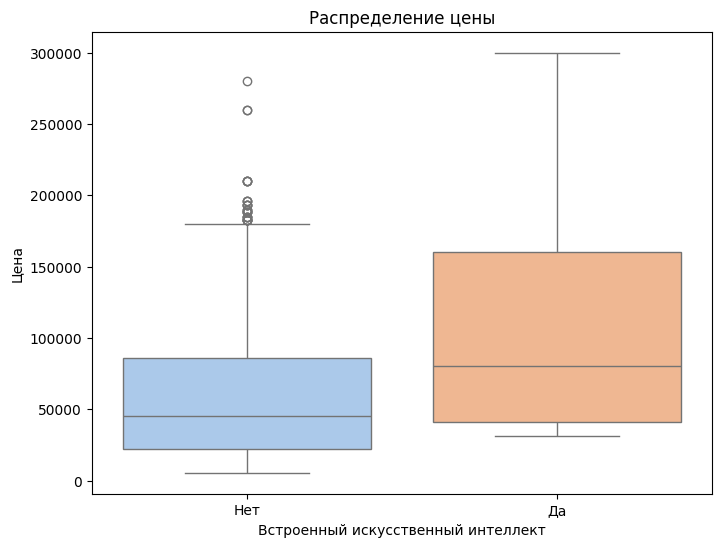

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Встроенный искусственный интеллект',
    y='salePrice',
    palette='pastel'
)
plt.xlabel('Встроенный искусственный интеллект')
plt.ylabel('Цена')
plt.title('Распределение цены')
plt.show()